# FOREST FIRE PREDCITION

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Dataset

In [4]:
#open csv file
df=pd.read_csv(r"D:\Datascience-final_project\Algerian_forest_fires_dataset_UPDATE.csv",header =1)

In [5]:
df.head() #it shows the first 5 rows of the dataset

day month  year Temperature  RH  Ws Rain   FFMC  DMC    DC  ISI  BUI  FWI  \
0   1     6  2012          29  57  18     0  65.7  3.4   7.6  1.3  3.4  0.5   
1   2     6  2012          29  61  13   1.3  64.4  4.1   7.6    1  3.9  0.4   
2   3     6  2012          26  82  22  13.1  47.1  2.5   7.1  0.3  2.7  0.1   
3   4     6  2012          25  89  13   2.5  28.6  1.3   6.9    0  1.7    0   
4   5     6  2012          27  77  16     0  64.8    3  14.2  1.2  3.9  0.5   

     Classes    
0  not fire     
1  not fire     
2  not fire     
3  not fire     
4  not fire

In [6]:
df.tail() # it shows the last 5 rows of the dataset

day month  year Temperature  RH  Ws Rain   FFMC  DMC    DC  ISI   BUI  \
241  26     9  2012          30  65  14     0  85.4   16  44.5  4.5  16.9   
242  27     9  2012          28  87  15   4.4  41.1  6.5     8  0.1   6.2   
243  28     9  2012          27  87  29   0.5  45.9  3.5   7.9  0.4   3.4   
244  29     9  2012          24  54  18   0.1  79.7  4.3  15.2  1.7   5.1   
245  30     9  2012          24  64  15   0.2  67.3  3.8  16.5  1.2   4.8   

     FWI     Classes    
241  6.5       fire     
242    0   not fire     
243  0.2   not fire     
244  0.7   not fire     
245  0.5  not fire

In [7]:
df  # it shows the full dataset

day month  year Temperature  RH  Ws Rain   FFMC  DMC    DC  ISI   BUI  \
0     1     6  2012          29  57  18     0  65.7  3.4   7.6  1.3   3.4   
1     2     6  2012          29  61  13   1.3  64.4  4.1   7.6    1   3.9   
2     3     6  2012          26  82  22  13.1  47.1  2.5   7.1  0.3   2.7   
3     4     6  2012          25  89  13   2.5  28.6  1.3   6.9    0   1.7   
4     5     6  2012          27  77  16     0  64.8    3  14.2  1.2   3.9   
..   ..   ...   ...         ...  ..  ..   ...   ...  ...   ...  ...   ...   
241  26     9  2012          30  65  14     0  85.4   16  44.5  4.5  16.9   
242  27     9  2012          28  87  15   4.4  41.1  6.5     8  0.1   6.2   
243  28     9  2012          27  87  29   0.5  45.9  3.5   7.9  0.4   3.4   
244  29     9  2012          24  54  18   0.1  79.7  4.3  15.2  1.7   5.1   
245  30     9  2012          24  64  15   0.2  67.3  3.8  16.5  1.2   4.8   

     FWI     Classes    
0    0.5   not fire     
1    0.4   not fire     
2    0.1   not fire     
3      0   not fire     
4    0.5   not fire     
..   ...           ...  
241  6.5       fire     
242    0   not fire     
243  0.2   not fire     
244  0.7   not fire     
245  0.5  not fire      

[246 rows x 14 columns]

# Data Cleaning

In [8]:
df.info() #it shows the information about the dataset


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      245 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


In [9]:
df.describe() #it describe the table

day month  year Temperature   RH   Ws Rain   FFMC  DMC   DC  ISI  BUI  \
count   246   245   245         245  245  245   245   245  245  245  245  245   
unique   33     5     2          20   63   19    40   174  167  199  107  174   
top       1     7  2012          35   64   14     0  88.9  7.9    8  1.1    3   
freq      8    62   244          29   10   43   133     8    5    5    8    5   

        FWI Classes    
count   245       245  
unique  127         9  
top     0.4   fire     
freq     12       132

In [10]:
df.columns #it shows the columns of the dataset

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

In [11]:
#Removing unnecessary space in column headers using str.strip()

df.columns=df.columns.str.strip()
df.columns
    

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

In [12]:
df.shape #it define No. of rows and columns

(246, 14)

In [13]:
df.isnull() #it check the null value

day  month   year  Temperature     RH     Ws   Rain   FFMC    DMC  \
0    False  False  False        False  False  False  False  False  False   
1    False  False  False        False  False  False  False  False  False   
2    False  False  False        False  False  False  False  False  False   
3    False  False  False        False  False  False  False  False  False   
4    False  False  False        False  False  False  False  False  False   
..     ...    ...    ...          ...    ...    ...    ...    ...    ...   
241  False  False  False        False  False  False  False  False  False   
242  False  False  False        False  False  False  False  False  False   
243  False  False  False        False  False  False  False  False  False   
244  False  False  False        False  False  False  False  False  False   
245  False  False  False        False  False  False  False  False  False   

        DC    ISI    BUI    FWI  Classes  
0    False  False  False  False    False  
1    False  False  False  False    False  
2    False  False  False  False    False  
3    False  False  False  False    False  
4    False  False  False  False    False  
..     ...    ...    ...    ...      ...  
241  False  False  False  False    False  
242  False  False  False  False    False  
243  False  False  False  False    False  
244  False  False  False  False    False  
245  False  False  False  False    False  

[246 rows x 14 columns]

In [14]:
df.isnull().sum() #Display null value in sum

day            0
month          1
year           1
Temperature    1
RH             1
Ws             1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        1
dtype: int64

In [15]:
df.dtypes

day            object
month          object
year           object
Temperature    object
RH             object
Ws             object
Rain           object
FFMC           object
DMC            object
DC             object
ISI            object
BUI            object
FWI            object
Classes        object
dtype: object

In [16]:
df[df.isnull().any(axis=1)]

day month year Temperature   RH   Ws Rain FFMC  \
122  Sidi-Bel Abbes Region Dataset   NaN  NaN         NaN  NaN  NaN  NaN  NaN   

     DMC   DC  ISI  BUI  FWI Classes  
122  NaN  NaN  NaN  NaN  NaN     NaN

# Data Engineering

Here the Missing values at 122th index seprate the data set in two regions.

1 : Bejaia Region Dataset

2 : Sidi-Bel Abbes Region Dataset

Therefore, we can make a new column based on the Region 

In [17]:
df.loc[:122,'Region']=1
df.loc[122:,'Region']=2
df[['Region']] = df[['Region']].astype(int)

In [18]:
df

day month  year Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI   BUI  \
0     1     6  2012          29  57  18     0  65.7  3.4   7.6  1.3   3.4   
1     2     6  2012          29  61  13   1.3  64.4  4.1   7.6    1   3.9   
2     3     6  2012          26  82  22  13.1  47.1  2.5   7.1  0.3   2.7   
3     4     6  2012          25  89  13   2.5  28.6  1.3   6.9    0   1.7   
4     5     6  2012          27  77  16     0  64.8    3  14.2  1.2   3.9   
..   ..   ...   ...         ...  ..  ..   ...   ...  ...   ...  ...   ...   
241  26     9  2012          30  65  14     0  85.4   16  44.5  4.5  16.9   
242  27     9  2012          28  87  15   4.4  41.1  6.5     8  0.1   6.2   
243  28     9  2012          27  87  29   0.5  45.9  3.5   7.9  0.4   3.4   
244  29     9  2012          24  54  18   0.1  79.7  4.3  15.2  1.7   5.1   
245  30     9  2012          24  64  15   0.2  67.3  3.8  16.5  1.2   4.8   

     FWI       Classes  Region  
0    0.5   not fire          1  
1    0.4   not fire          1  
2    0.1   not fire          1  
3      0   not fire          1  
4    0.5   not fire          1  
..   ...           ...     ...  
241  6.5       fire          2  
242    0   not fire          2  
243  0.2   not fire          2  
244  0.7   not fire          2  
245  0.5  not fire           2  

[246 rows x 15 columns]

In [19]:
# Remove null or na values rows

df =df.dropna().reset_index(drop=True) 
df.shape


(245, 15)

In [20]:
df.iloc[[122]]

day  month  year  Temperature   RH   Ws   Rain  FFMC  DMC  DC  ISI  BUI  \
122  day  month  year  Temperature   RH   Ws  Rain   FFMC  DMC  DC  ISI  BUI   

     FWI    Classes  Region  
122  FWI  Classes         2

In [21]:
df[df.duplicated()] #to check the duplicate value is there or not

Empty DataFrame
Columns: [day, month, year, Temperature, RH, Ws, Rain, FFMC, DMC, DC, ISI, BUI, FWI, Classes, Region]
Index: []

In [22]:
#removing the 122 row
df1=df.drop(122).reset_index(drop=True)
pd.set_option('display.max_rows', None) #it display full dataset
df1

day month  year Temperature  RH  Ws  Rain  FFMC   DMC     DC   ISI   BUI  \
0     1     6  2012          29  57  18     0  65.7   3.4    7.6   1.3   3.4   
1     2     6  2012          29  61  13   1.3  64.4   4.1    7.6     1   3.9   
2     3     6  2012          26  82  22  13.1  47.1   2.5    7.1   0.3   2.7   
3     4     6  2012          25  89  13   2.5  28.6   1.3    6.9     0   1.7   
4     5     6  2012          27  77  16     0  64.8     3   14.2   1.2   3.9   
5     6     6  2012          31  67  14     0  82.6   5.8   22.2   3.1     7   
6     7     6  2012          33  54  13     0  88.2   9.9   30.5   6.4  10.9   
7     8     6  2012          30  73  15     0  86.6  12.1   38.3   5.6  13.5   
8     9     6  2012          25  88  13   0.2  52.9   7.9   38.8   0.4  10.5   
9    10     6  2012          28  79  12     0  73.2   9.5   46.3   1.3  12.6   
10   11     6  2012          31  65  14     0  84.5  12.5   54.3     4  15.8   
11   12     6  2012          26  81  19     0    84  13.8   61.4   4.8  17.7   
12   13     6  2012          27  84  21   1.2    50   6.7     17   0.5   6.7   
13   14     6  2012          30  78  20   0.5    59   4.6    7.8     1   4.4   
14   15     6  2012          28  80  17   3.1  49.4     3    7.4   0.4     3   
15   16     6  2012          29  89  13   0.7  36.1   1.7    7.6     0   2.2   
16   17     6  2012          30  89  16   0.6  37.3   1.1    7.8     0   1.6   
17   18     6  2012          31  78  14   0.3  56.9   1.9      8   0.7   2.4   
18   19     6  2012          31  55  16   0.1  79.9   4.5     16   2.5   5.3   
19   20     6  2012          30  80  16   0.4  59.8   3.4   27.1   0.9   5.1   
20   21     6  2012          30  78  14     0    81   6.3   31.6   2.6   8.4   
21   22     6  2012          31  67  17   0.1  79.1     7   39.5   2.4   9.7   
22   23     6  2012          32  62  18   0.1  81.4   8.2   47.7   3.3  11.5   
23   24     6  2012          32  66  17     0  85.9  11.2   55.8   5.6  14.9   
24   25     6  2012          31  64  15     0  86.7  14.2   63.8   5.7  18.3   
25   26     6  2012          31  64  18     0  86.8  17.8   71.8   6.7  21.6   
26   27     6  2012          34  53  18     0    89  21.6   80.3   9.2  25.8   
27   28     6  2012          32  55  14     0  89.1  25.5   88.5   7.6  29.7   
28   29     6  2012          32  47  13   0.3  79.9  18.4   84.4   2.2  23.8   
29   30     6  2012          33  50  14     0  88.7  22.9   92.8   7.2  28.3   
30    1     7  2012          29  68  19     1  59.9   2.5    8.6   1.1   2.9   
31    2     7  2012          27  75  19   1.2  55.7   2.4    8.3   0.8   2.8   
32    3     7  2012          32  76  20   0.7  63.1   2.6    9.2   1.3     3   
33    4     7  2012          33  78  17     0  80.1   4.6   18.5   2.7   5.7   
34    5     7  2012          33  66  14     0  85.9   7.6   27.9   4.8   9.1   
35    6     7  2012          32  63  14     0    87  10.9     37   5.6  12.5   
36    7     7  2012          35  64  18   0.2    80   9.7   40.4   2.8  12.1   
37    8     7  2012          33  68  19     0  85.6  12.5   49.8     6  15.4   
38    9     7  2012          32  68  14   1.4  66.6   7.7    9.2   1.1   7.4   
39   10     7  2012          33  69  13   0.7  66.6     6    9.3   1.1   5.8   
40   11     7  2012          33  76  14     0  81.1   8.1   18.7   2.6   8.1   
41   12     7  2012          31  75  13   0.1  75.1   7.9   27.7   1.5   9.2   
42   13     7  2012          34  81  15     0  81.8   9.7   37.2     3  11.7   
43   14     7  2012          34  61  13   0.6  73.9   7.8   22.9   1.4   8.4   
44   15     7  2012          30  80  19   0.4  60.7   5.2     17   1.1   5.9   
45   16     7  2012          28  76  21     0  72.6     7   25.5   0.7   8.3   
46   17     7  2012          29  70  14     0  82.8   9.4   34.1   3.2  11.1   
47   18     7  2012          31  68  14     0  85.4  12.1   43.1   4.6  14.2   
48   19     7  2012          35  59  17     0  88.1    12   52.8   7.7  18.2   
49  

In [23]:
df1.shape

(244, 15)

In [24]:
df1[df1.isnull().any(axis=1)] # inorder to check the row which is having the missing values


Empty DataFrame
Columns: [day, month, year, Temperature, RH, Ws, Rain, FFMC, DMC, DC, ISI, BUI, FWI, Classes, Region]
Index: []

In [25]:
df1.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [26]:
df1.Classes.unique() #it returns the same word of the columns


array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

In [27]:
#remove the unwanted spaces

df1.Classes=df1.Classes.str.strip()
df1.Classes.unique()

array(['not fire', 'fire'], dtype=object)

In [28]:
# Encoding Not fire as 0 and Fire as 1

df1['Classes']= np.where(df1['Classes']== 'not fire',0,1)
df1.head(10)

day month  year Temperature  RH  Ws  Rain  FFMC   DMC    DC  ISI   BUI  FWI  \
0   1     6  2012          29  57  18     0  65.7   3.4   7.6  1.3   3.4  0.5   
1   2     6  2012          29  61  13   1.3  64.4   4.1   7.6    1   3.9  0.4   
2   3     6  2012          26  82  22  13.1  47.1   2.5   7.1  0.3   2.7  0.1   
3   4     6  2012          25  89  13   2.5  28.6   1.3   6.9    0   1.7    0   
4   5     6  2012          27  77  16     0  64.8     3  14.2  1.2   3.9  0.5   
5   6     6  2012          31  67  14     0  82.6   5.8  22.2  3.1     7  2.5   
6   7     6  2012          33  54  13     0  88.2   9.9  30.5  6.4  10.9  7.2   
7   8     6  2012          30  73  15     0  86.6  12.1  38.3  5.6  13.5  7.1   
8   9     6  2012          25  88  13   0.2  52.9   7.9  38.8  0.4  10.5  0.3   
9  10     6  2012          28  79  12     0  73.2   9.5  46.3  1.3  12.6  0.9   

   Classes  Region  
0        0       1  
1        0       1  
2        0       1  
3        0       1  
4        0       1  
5        1       1  
6        1       1  
7        1       1  
8        0       1  
9        0       1

In [29]:
print(df1.isnull().sum())


day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64


In [30]:
df1.dropna() #it is used for dropping the column contains Null values.

day month  year Temperature  RH  Ws  Rain  FFMC   DMC     DC   ISI   BUI  \
0     1     6  2012          29  57  18     0  65.7   3.4    7.6   1.3   3.4   
1     2     6  2012          29  61  13   1.3  64.4   4.1    7.6     1   3.9   
2     3     6  2012          26  82  22  13.1  47.1   2.5    7.1   0.3   2.7   
3     4     6  2012          25  89  13   2.5  28.6   1.3    6.9     0   1.7   
4     5     6  2012          27  77  16     0  64.8     3   14.2   1.2   3.9   
5     6     6  2012          31  67  14     0  82.6   5.8   22.2   3.1     7   
6     7     6  2012          33  54  13     0  88.2   9.9   30.5   6.4  10.9   
7     8     6  2012          30  73  15     0  86.6  12.1   38.3   5.6  13.5   
8     9     6  2012          25  88  13   0.2  52.9   7.9   38.8   0.4  10.5   
9    10     6  2012          28  79  12     0  73.2   9.5   46.3   1.3  12.6   
10   11     6  2012          31  65  14     0  84.5  12.5   54.3     4  15.8   
11   12     6  2012          26  81  19     0    84  13.8   61.4   4.8  17.7   
12   13     6  2012          27  84  21   1.2    50   6.7     17   0.5   6.7   
13   14     6  2012          30  78  20   0.5    59   4.6    7.8     1   4.4   
14   15     6  2012          28  80  17   3.1  49.4     3    7.4   0.4     3   
15   16     6  2012          29  89  13   0.7  36.1   1.7    7.6     0   2.2   
16   17     6  2012          30  89  16   0.6  37.3   1.1    7.8     0   1.6   
17   18     6  2012          31  78  14   0.3  56.9   1.9      8   0.7   2.4   
18   19     6  2012          31  55  16   0.1  79.9   4.5     16   2.5   5.3   
19   20     6  2012          30  80  16   0.4  59.8   3.4   27.1   0.9   5.1   
20   21     6  2012          30  78  14     0    81   6.3   31.6   2.6   8.4   
21   22     6  2012          31  67  17   0.1  79.1     7   39.5   2.4   9.7   
22   23     6  2012          32  62  18   0.1  81.4   8.2   47.7   3.3  11.5   
23   24     6  2012          32  66  17     0  85.9  11.2   55.8   5.6  14.9   
24   25     6  2012          31  64  15     0  86.7  14.2   63.8   5.7  18.3   
25   26     6  2012          31  64  18     0  86.8  17.8   71.8   6.7  21.6   
26   27     6  2012          34  53  18     0    89  21.6   80.3   9.2  25.8   
27   28     6  2012          32  55  14     0  89.1  25.5   88.5   7.6  29.7   
28   29     6  2012          32  47  13   0.3  79.9  18.4   84.4   2.2  23.8   
29   30     6  2012          33  50  14     0  88.7  22.9   92.8   7.2  28.3   
30    1     7  2012          29  68  19     1  59.9   2.5    8.6   1.1   2.9   
31    2     7  2012          27  75  19   1.2  55.7   2.4    8.3   0.8   2.8   
32    3     7  2012          32  76  20   0.7  63.1   2.6    9.2   1.3     3   
33    4     7  2012          33  78  17     0  80.1   4.6   18.5   2.7   5.7   
34    5     7  2012          33  66  14     0  85.9   7.6   27.9   4.8   9.1   
35    6     7  2012          32  63  14     0    87  10.9     37   5.6  12.5   
36    7     7  2012          35  64  18   0.2    80   9.7   40.4   2.8  12.1   
37    8     7  2012          33  68  19     0  85.6  12.5   49.8     6  15.4   
38    9     7  2012          32  68  14   1.4  66.6   7.7    9.2   1.1   7.4   
39   10     7  2012          33  69  13   0.7  66.6     6    9.3   1.1   5.8   
40   11     7  2012          33  76  14     0  81.1   8.1   18.7   2.6   8.1   
41   12     7  2012          31  75  13   0.1  75.1   7.9   27.7   1.5   9.2   
42   13     7  2012          34  81  15     0  81.8   9.7   37.2     3  11.7   
43   14     7  2012          34  61  13   0.6  73.9   7.8   22.9   1.4   8.4   
44   15     7  2012          30  80  19   0.4  60.7   5.2     17   1.1   5.9   
45   16     7  2012          28  76  21     0  72.6     7   25.5   0.7   8.3   
46   17     7  2012          29  70  14     0  82.8   9.4   34.1   3.2  11.1   
47   18     7  2012          31  68  14     0  85.4  12.1   43.1   4.6  14.2   
48   19     7  2012          35  59  17     0  88.1    12   52.8   7.7  18.2   
49  

In [31]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          244 non-null    object
 1   month        244 non-null    object
 2   year         244 non-null    object
 3   Temperature  244 non-null    object
 4   RH           244 non-null    object
 5   Ws           244 non-null    object
 6   Rain         244 non-null    object
 7   FFMC         244 non-null    object
 8   DMC          244 non-null    object
 9   DC           244 non-null    object
 10  ISI          244 non-null    object
 11  BUI          244 non-null    object
 12  FWI          244 non-null    object
 13  Classes      244 non-null    int32 
 14  Region       244 non-null    int32 
dtypes: int32(2), object(13)
memory usage: 26.8+ KB


In [32]:
#Convert the data into float and integer type

df1[['month', 'day', 'year', 'Temperature','RH', 'Ws']] = df1[['month', 'day', 'year', 'Temperature','RH', 'Ws']].astype(int)

In [33]:
objects = [features for features in df1.columns if df1[features].dtypes=='O']
for i in objects:
    if i != 'Classes':
        df1[i] = df1[i].astype(float)

In [34]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int32  
 1   month        244 non-null    int32  
 2   year         244 non-null    int32  
 3   Temperature  244 non-null    int32  
 4   RH           244 non-null    int32  
 5   Ws           244 non-null    int32  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    float64
 13  Classes      244 non-null    int32  
 14  Region       244 non-null    int32  
dtypes: float64(7), int32(8)
memory usage: 21.1 KB


In [35]:
df1.describe().T

count         mean        std     min       25%      50%  \
day          244.0    15.754098   8.825059     1.0     8.000    16.00   
month        244.0     7.500000   1.112961     6.0     7.000     7.50   
year         244.0  2012.000000   0.000000  2012.0  2012.000  2012.00   
Temperature  244.0    32.172131   3.633843    22.0    30.000    32.00   
RH           244.0    61.938525  14.884200    21.0    52.000    63.00   
Ws           244.0    15.504098   2.810178     6.0    14.000    15.00   
Rain         244.0     0.760656   1.999406     0.0     0.000     0.00   
FFMC         244.0    77.887705  14.337571    28.6    72.075    83.50   
DMC          244.0    14.673361  12.368039     0.7     5.800    11.30   
DC           244.0    49.288115  47.619662     6.9    13.275    33.10   
ISI          244.0     4.759836   4.154628     0.0     1.400     3.50   
BUI          244.0    16.673361  14.201648     1.1     6.000    12.45   
FWI          244.0     7.049180   7.428366     0.0     0.700     4.45   
Classes      244.0     0.565574   0.496700     0.0     0.000     1.00   
Region       244.0     1.500000   0.501028     1.0     1.000     1.50   

                  75%     max  
day            23.000    31.0  
month           8.000     9.0  
year         2012.000  2012.0  
Temperature    35.000    42.0  
RH             73.250    90.0  
Ws             17.000    29.0  
Rain            0.500    16.8  
FFMC           88.300    96.0  
DMC            20.750    65.9  
DC             68.150   220.4  
ISI             7.300    19.0  
BUI            22.525    68.0  
FWI            11.375    31.1  
Classes         1.000     1.0  
Region          2.000     2.0

In [36]:
df1.describe(include = 'all')

day       month    year  Temperature          RH          Ws  \
count  244.000000  244.000000   244.0   244.000000  244.000000  244.000000   
mean    15.754098    7.500000  2012.0    32.172131   61.938525   15.504098   
std      8.825059    1.112961     0.0     3.633843   14.884200    2.810178   
min      1.000000    6.000000  2012.0    22.000000   21.000000    6.000000   
25%      8.000000    7.000000  2012.0    30.000000   52.000000   14.000000   
50%     16.000000    7.500000  2012.0    32.000000   63.000000   15.000000   
75%     23.000000    8.000000  2012.0    35.000000   73.250000   17.000000   
max     31.000000    9.000000  2012.0    42.000000   90.000000   29.000000   

             Rain        FFMC         DMC          DC         ISI         BUI  \
count  244.000000  244.000000  244.000000  244.000000  244.000000  244.000000   
mean     0.760656   77.887705   14.673361   49.288115    4.759836   16.673361   
std      1.999406   14.337571   12.368039   47.619662    4.154628   14.201648   
min      0.000000   28.600000    0.700000    6.900000    0.000000    1.100000   
25%      0.000000   72.075000    5.800000   13.275000    1.400000    6.000000   
50%      0.000000   83.500000   11.300000   33.100000    3.500000   12.450000   
75%      0.500000   88.300000   20.750000   68.150000    7.300000   22.525000   
max     16.800000   96.000000   65.900000  220.400000   19.000000   68.000000   

              FWI     Classes      Region  
count  244.000000  244.000000  244.000000  
mean     7.049180    0.565574    1.500000  
std      7.428366    0.496700    0.501028  
min      0.000000    0.000000    1.000000  
25%      0.700000    0.000000    1.000000  
50%      4.450000    1.000000    1.500000  
75%     11.375000    1.000000    2.000000  
max     31.100000    1.000000    2.000000

In [37]:
df1.corr()

day         month  year  Temperature        RH  \
day          1.000000e+00  2.232788e-17   NaN     0.095772 -0.074209   
month        2.232788e-17  1.000000e+00   NaN    -0.059017 -0.037884   
year                  NaN           NaN   NaN          NaN       NaN   
Temperature  9.577222e-02 -5.901677e-02   NaN     1.000000 -0.654443   
RH          -7.420934e-02 -3.788419e-02   NaN    -0.654443  1.000000   
Ws           4.700086e-02 -4.144673e-02   NaN    -0.278132  0.236084   
Rain        -1.122654e-01  3.532207e-02   NaN    -0.326786  0.222968   
FFMC         2.240321e-01  1.557668e-02   NaN     0.677491 -0.645658   
DMC          4.915710e-01  6.817778e-02   NaN     0.483105 -0.405133   
DC           5.279285e-01  1.276719e-01   NaN     0.370498 -0.220330   
ISI          1.793008e-01  6.354476e-02   NaN     0.605971 -0.688268   
BUI          5.172239e-01  8.556743e-02   NaN     0.456415 -0.349685   
FWI          3.502343e-01  8.173226e-02   NaN     0.566839 -0.580457   
Classes      2.017844e-01  2.233266e-02   NaN     0.518119 -0.435023   
Region       3.909990e-16 -2.023760e-16   NaN     0.273496 -0.406424   

                   Ws      Rain      FFMC       DMC        DC       ISI  \
day          0.047001 -0.112265  0.224032  0.491571  0.527929  0.179301   
month       -0.041447  0.035322  0.015577  0.068178  0.127672  0.063545   
year              NaN       NaN       NaN       NaN       NaN       NaN   
Temperature -0.278132 -0.326786  0.677491  0.483105  0.370498  0.605971   
RH           0.236084  0.222968 -0.645658 -0.405133 -0.220330 -0.688268   
Ws           1.000000  0.170169 -0.163255 -0.001246  0.076245  0.012245   
Rain         0.170169  1.000000 -0.544045 -0.288548 -0.296804 -0.347862   
FFMC        -0.163255 -0.544045  1.000000  0.602391  0.503910  0.740751   
DMC         -0.001246 -0.288548  0.602391  1.000000  0.875358  0.678355   
DC           0.076245 -0.296804  0.503910  0.875358  1.000000  0.503919   
ISI          0.012245 -0.347862  0.740751  0.678355  0.503919  1.000000   
BUI          0.030303 -0.299409  0.590251  0.982206  0.941672  0.641351   
FWI          0.033957 -0.324755  0.691430  0.875191  0.737041  0.922422   
Classes     -0.066529 -0.379449  0.770114  0.584188  0.507122  0.736142   
Region      -0.176829 -0.041080  0.224680  0.191094 -0.081489  0.266298   

                  BUI       FWI   Classes        Region  
day          0.517224  0.350234  0.201784  3.909990e-16  
month        0.085567  0.081732  0.022333 -2.023760e-16  
year              NaN       NaN       NaN           NaN  
Temperature  0.456415  0.566839  0.518119  2.734961e-01  
RH          -0.349685 -0.580457 -0.435023 -4.064239e-01  
Ws           0.030303  0.033957 -0.066529 -1.768290e-01  
Rain        -0.299409 -0.324755 -0.379449 -4.108006e-02  
FFMC         0.590251  0.691430  0.770114  2.246798e-01  
DMC          0.982206  0.875191  0.584188  1.910937e-01  
DC           0.941672  0.737041  0.507122 -8.148947e-02  
ISI          0.641351  0.922422  0.736142  2.662977e-01  
BUI          1.000000  0.856912  0.584545  8.799645e-02  
FWI          0.856912  1.000000  0.719407  1.984738e-01  
Classes      0.584545  0.719407  1.000000  1.653627e-01  
Region       0.087996  0.198474  0.165363  1.000000e+00

In [38]:
# Saving the cleaned data as new csv file
#df1.to_csv(r'D:\Datascience-final_project\Forest-fire_clean_data.csv', index=False)

# Exploratory Data Analysis

## Univariant Analysis:

In [39]:
numeric_features = [feature for feature in df1.columns if df1[feature].dtype != 'O']


In [40]:
numeric_features

['day',
 'month',
 'year',
 'Temperature',
 'RH',
 'Ws',
 'Rain',
 'FFMC',
 'DMC',
 'DC',
 'ISI',
 'BUI',
 'FWI',
 'Classes',
 'Region']

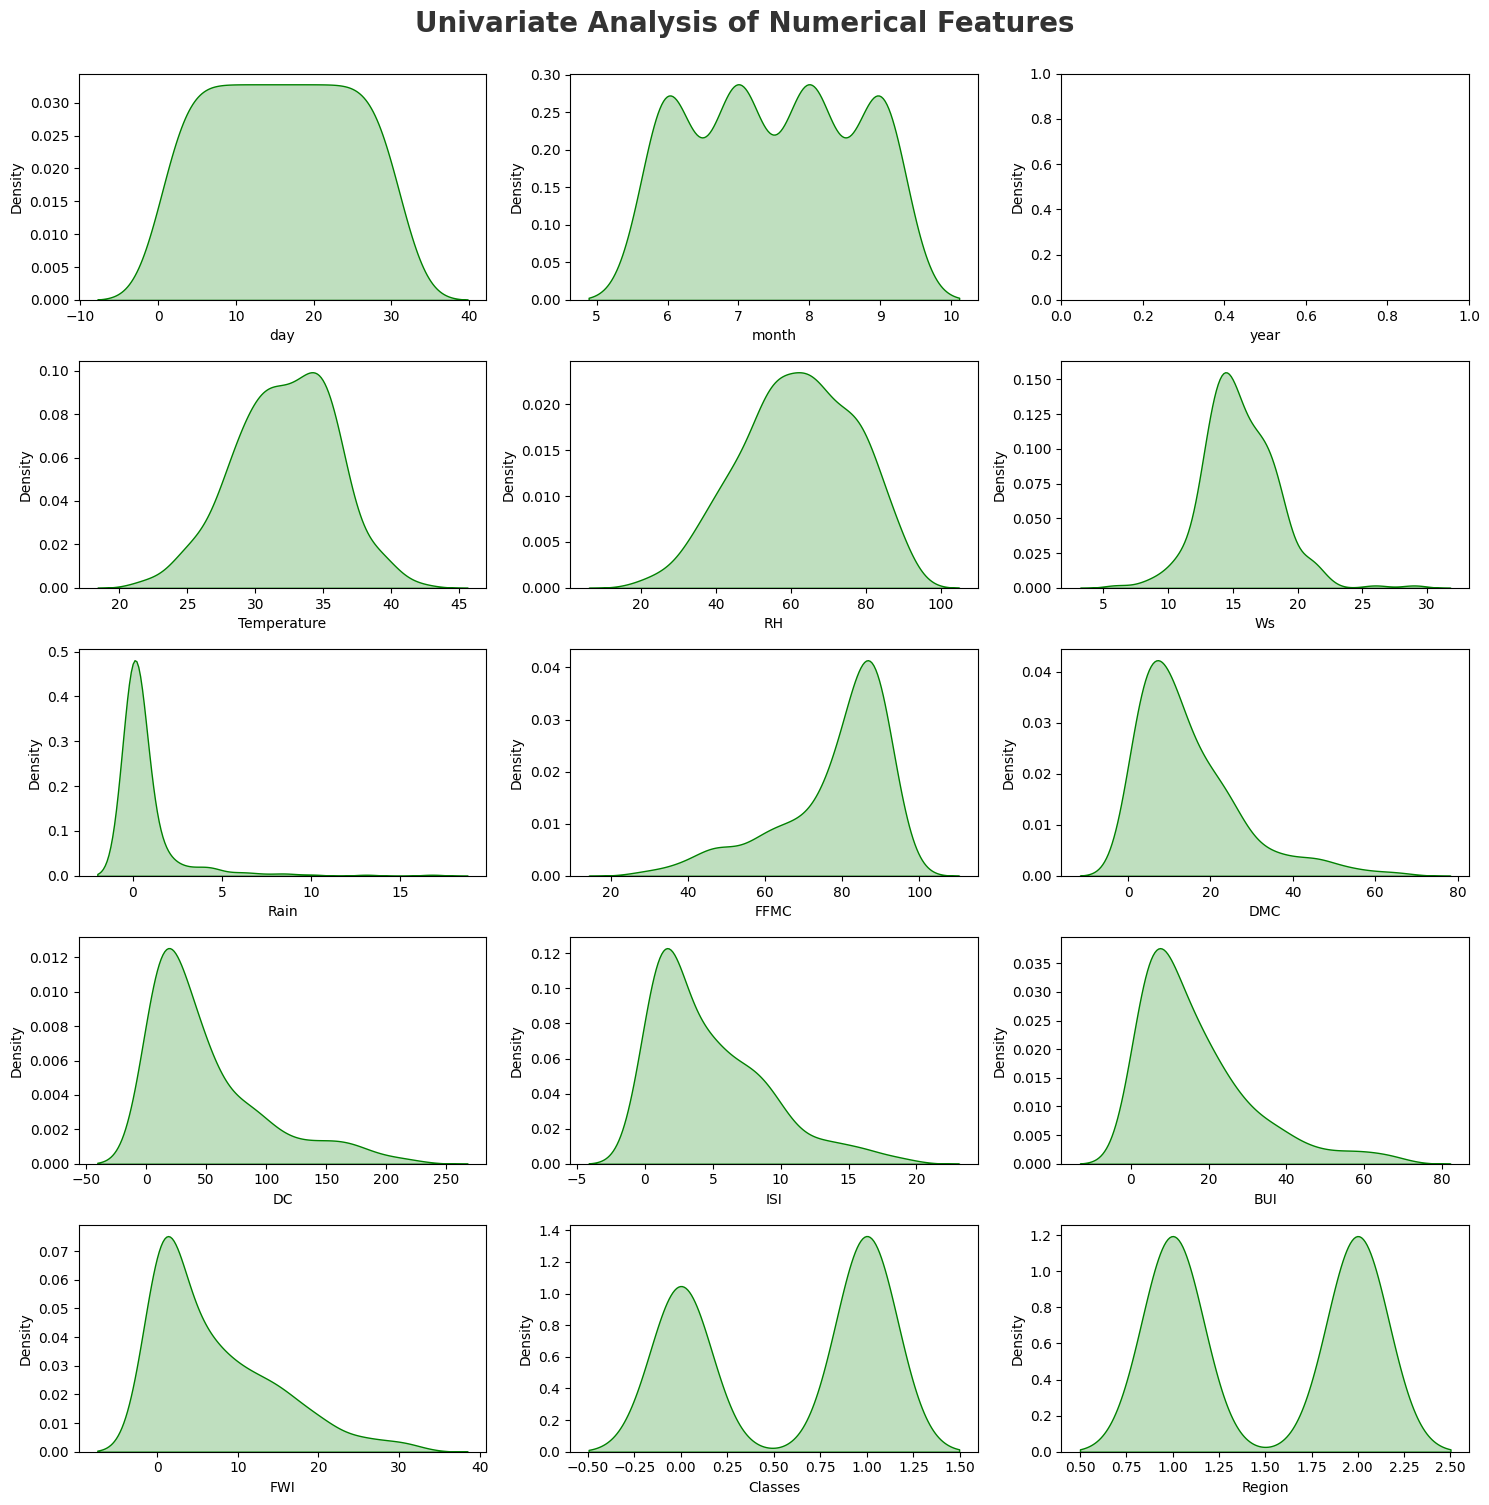

In [41]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)


for i in range(0, len(numeric_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df1[numeric_features[i]],fill=True, color='green',warn_singular=False)
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

# Observations:

Temperature : temperature noon (temperature max) in Celsius degrees: 22 to 42

RH : Relative Humidity in %: 21 to 90

Ws :Wind speed in km/h: 6 to 29

Rain: total day in mm: 0 to 16.8

(FFMC) Fine Fuel Moisture Code index from the FWI system: 28.6 to 92.5

(DMC) Duff Moisture Code index from the FWI system: 1.1 to 65.9

(DC) Drought Code index from the FWI system: 7 to 220.4

(ISI) Initial Spread Index from the FWI system: 0 to 18.5

(BUI) Buildup Index from the FWI system: 1.1 to 68

(FWI) Fire Weather Index: 0 to 31.1

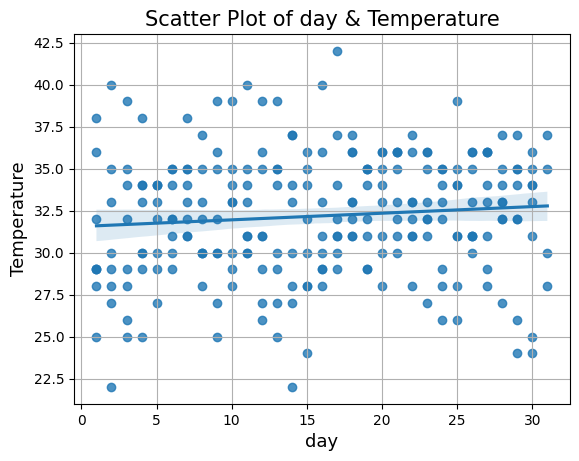

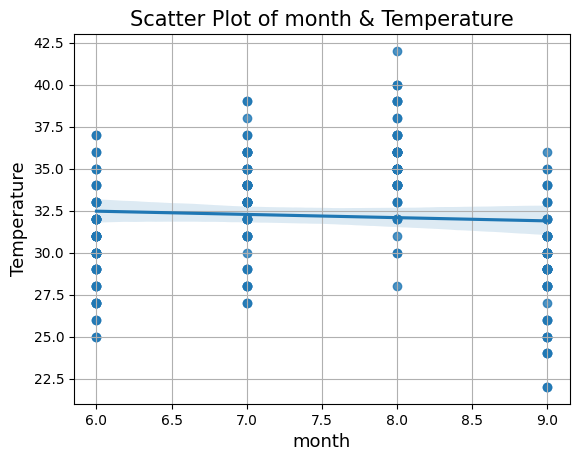

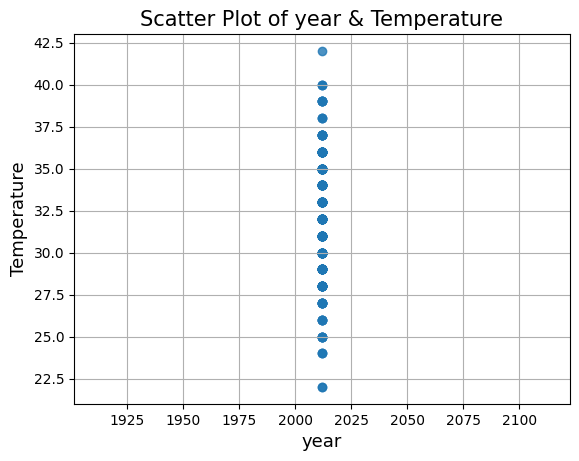

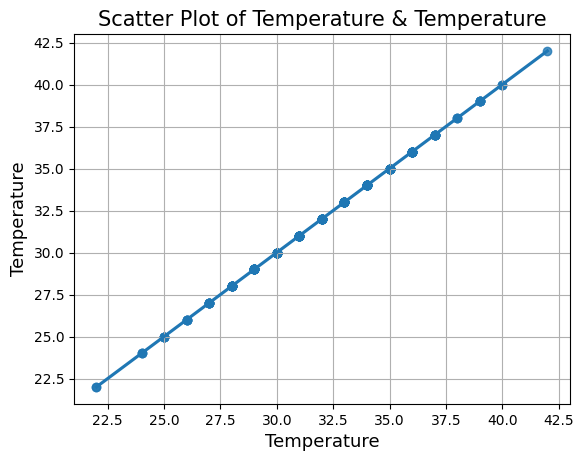

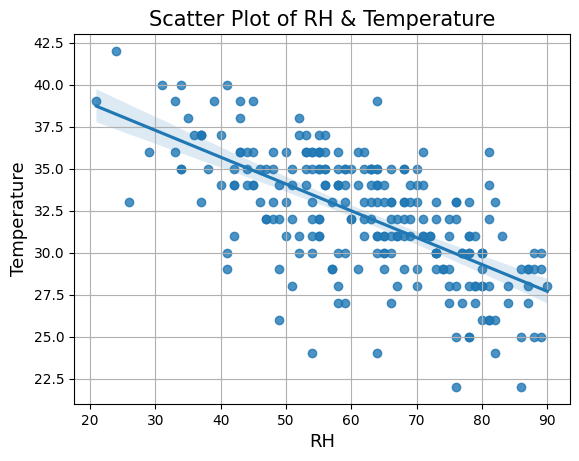

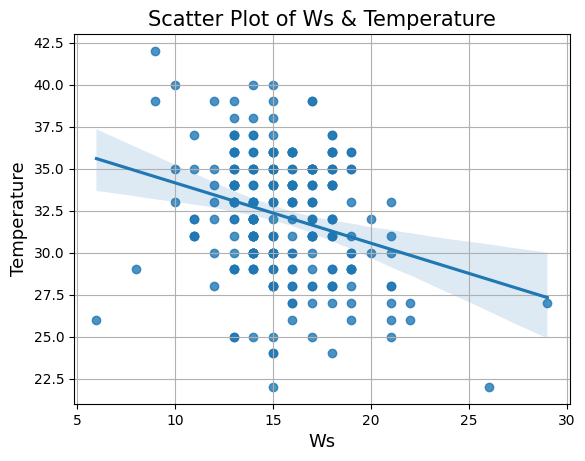

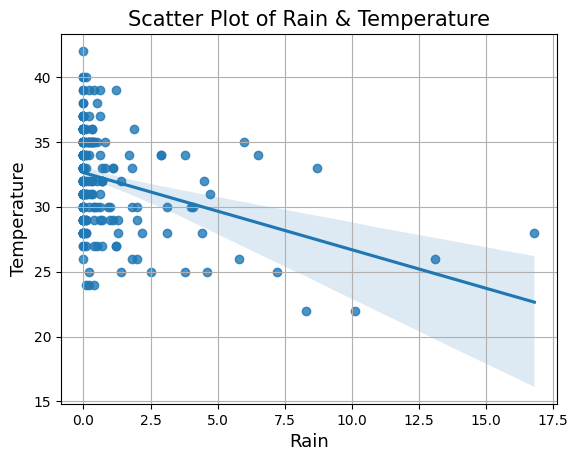

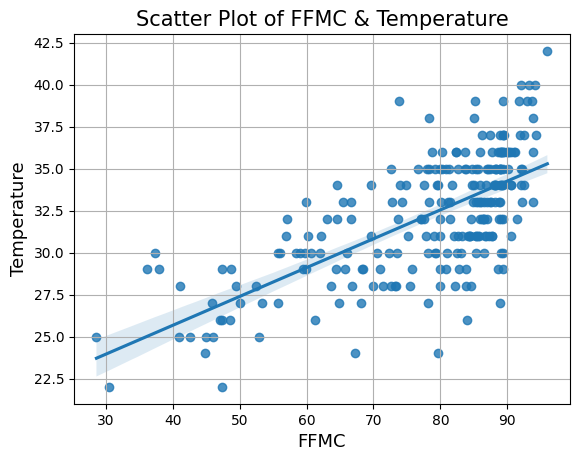

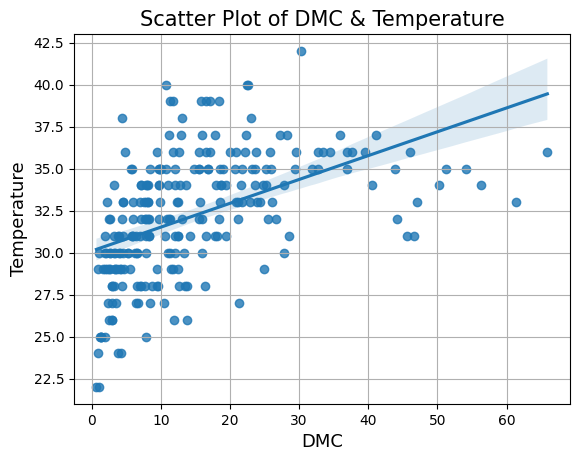

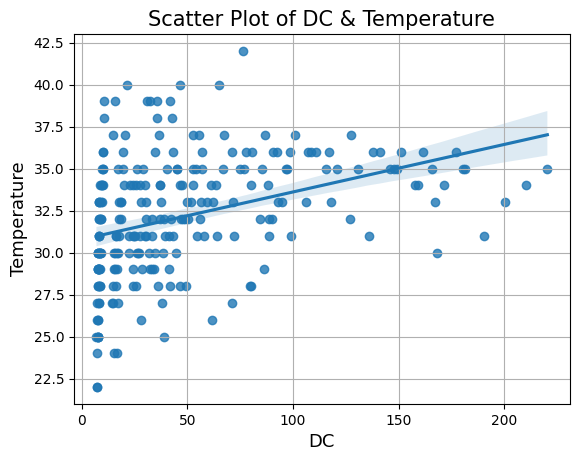

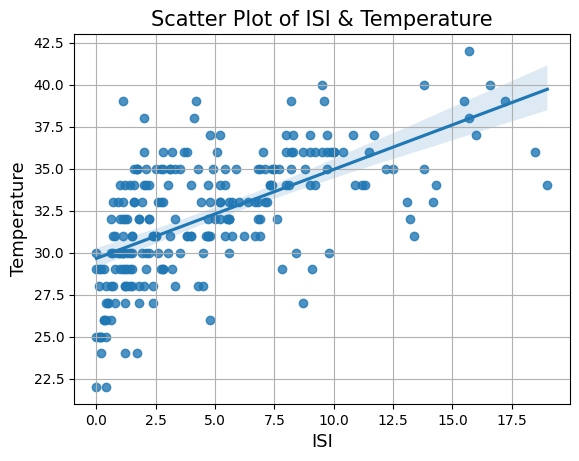

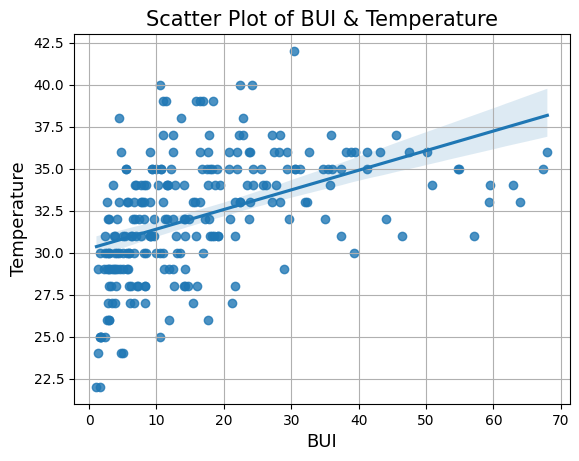

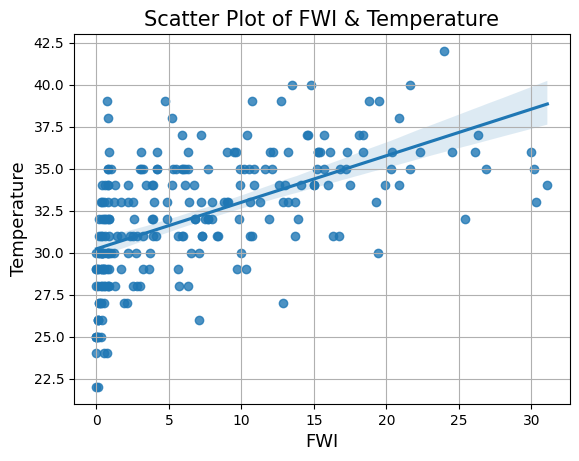

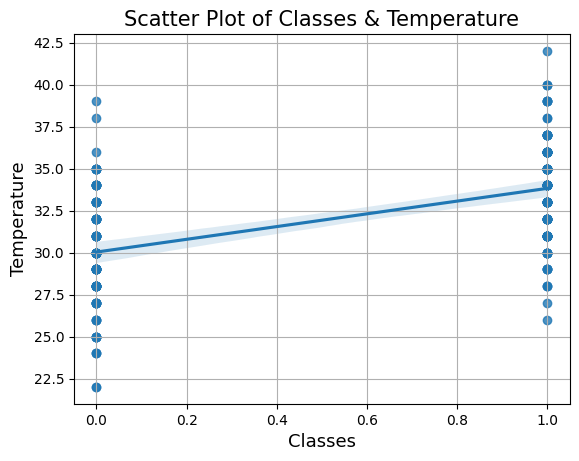

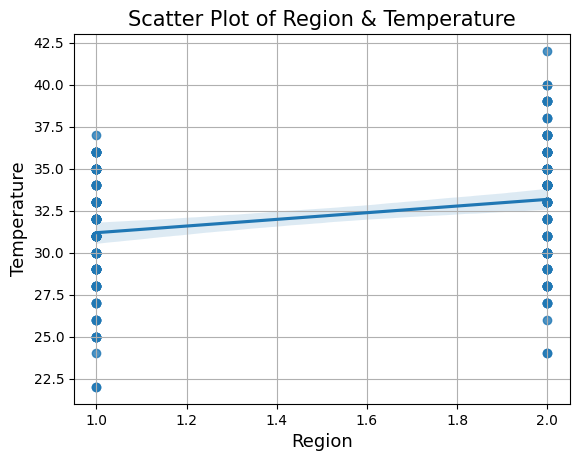

In [42]:
# #Scattter plot for each column with temperature
x_axis = numeric_features
y = "Temperature"

for col in x_axis:
     sns.regplot(x = col, y = y, data = df1)
     plt.xlabel(col, fontsize = 13)
     plt.ylabel(y, fontsize = 13)
     plt.title("Scatter Plot of " + col + " & " + y, fontsize = 15)
     plt.grid()
     plt.show()

# Observations:

As we are considering Temperature as our dependent feature we are checking relation of each feature with it.

RH shows negative correlation with Temperature as increase in RH reduces the Temperature.

WS too shows negative correlation with Temperature but not as strong as RH.

FFMC shows strong positive correlation as Temperature increases with FFMC which is clearly seen from the plot.

ISI shows positive correlation with Temperature.

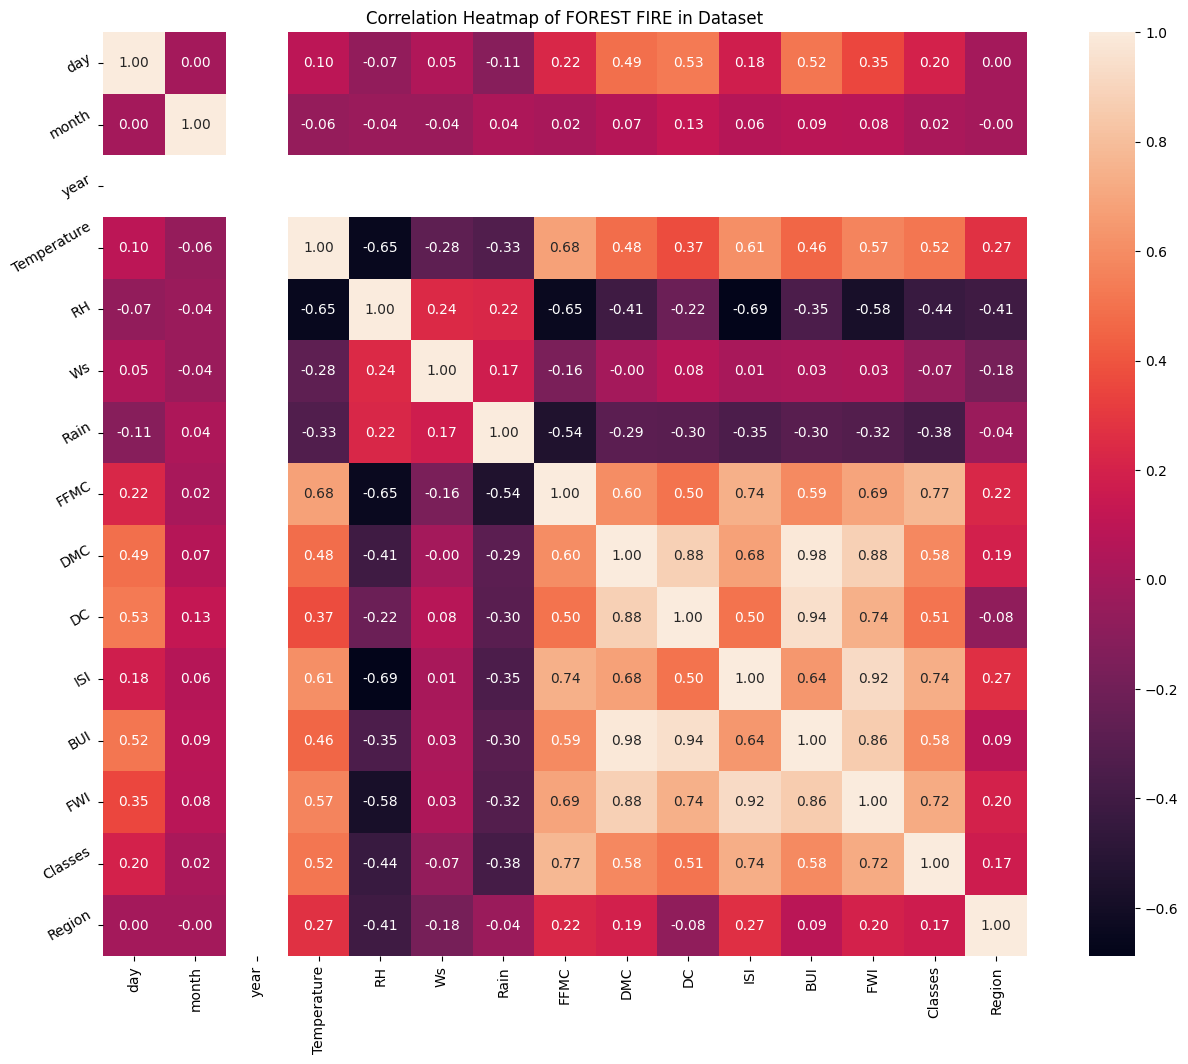

In [43]:
#HEATMAP
#A heatmap is a graphical representation of data that uses a system of color-coding to represent different values. 
#using a correlation heatmap to view rlationship between variables

plt.figure(figsize=(16,12))
plt.title('Correlation Heatmap of FOREST FIRE in Dataset')
ax = sns.heatmap(df1.corr(), square=True, annot=True, fmt='.2f', linecolor='white')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=30)           
plt.show()

RH is negatively corelated with Temperature, FFMC and ISI

Rain is negatively correlated with Temperature and FFMC,DMC, ISI and BUI

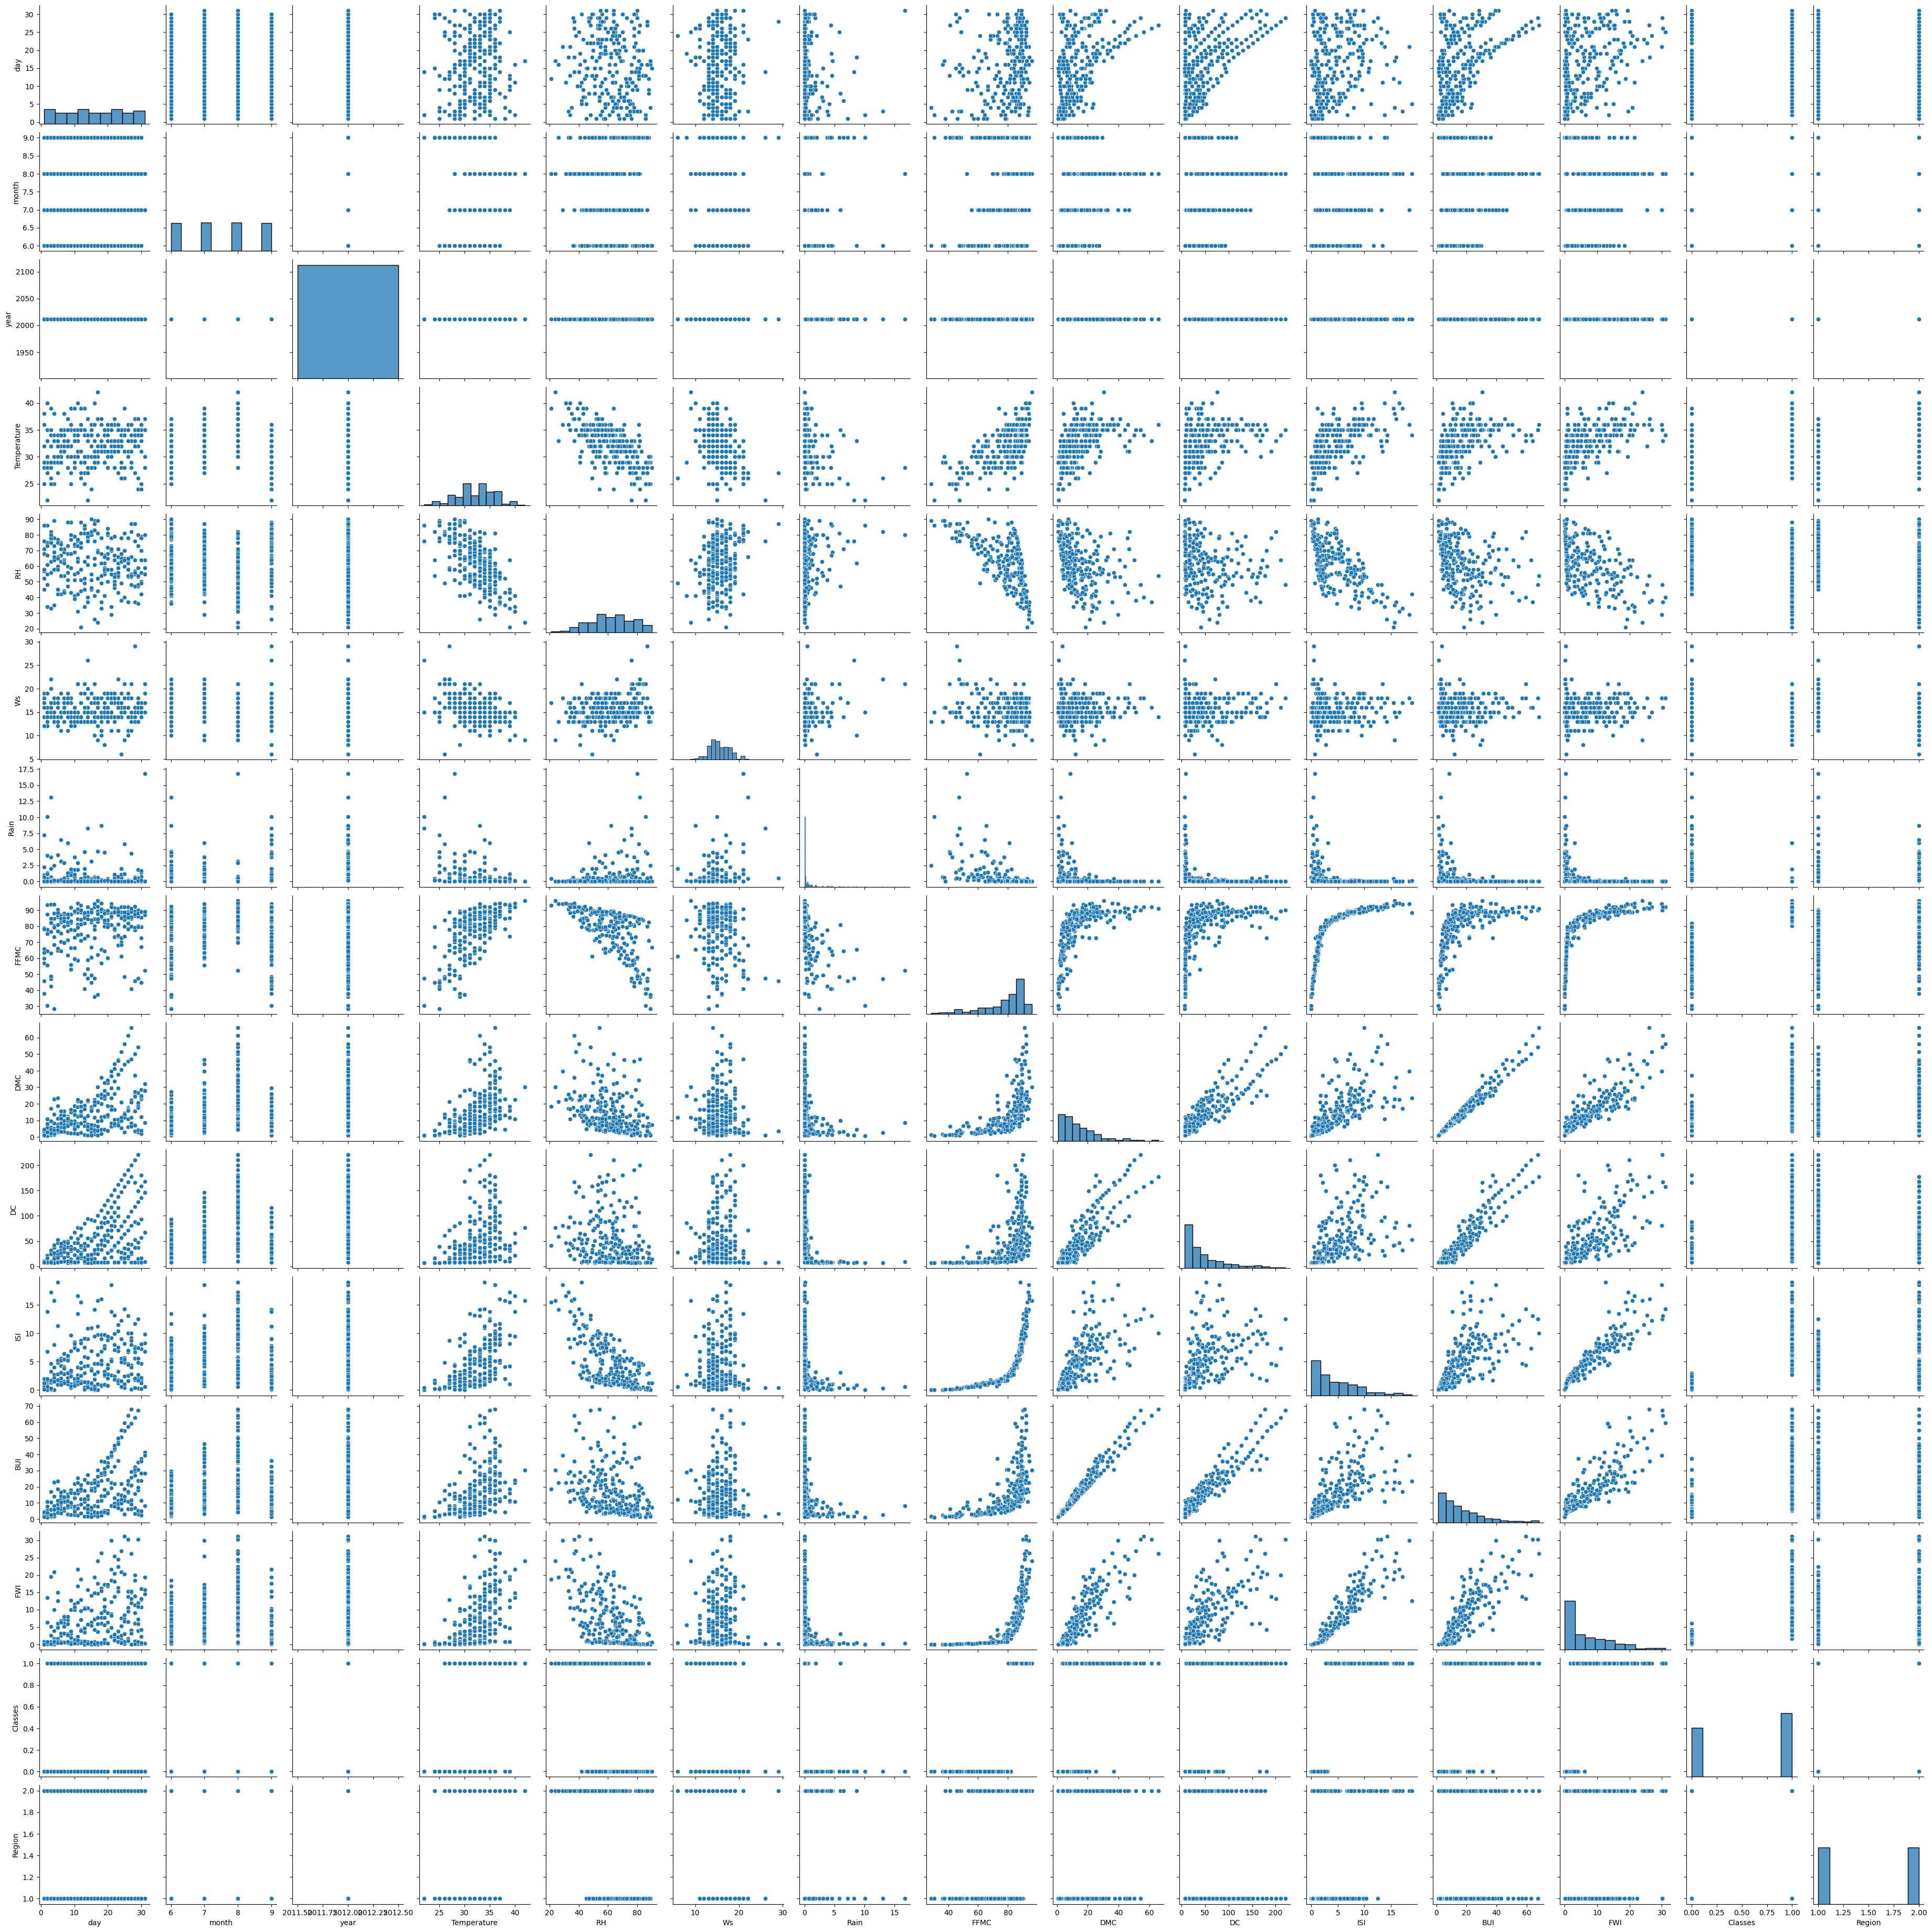

In [44]:
#define extract the variables which are highly correlated       
#num_var= ['Temperature','RH','ISI','Ws','FFMC']
sns.pairplot(df1[numeric_features], kind='scatter', diag_kind='hist')
plt.show()


In [45]:
#PLot density plot for all features
# plt.style.use('seaborn')
# df1.hist(bins=50, figsize=(20,15), ec = 'b')
# plt.show()

array([[<AxesSubplot: title={'center': 'day'}>,
        <AxesSubplot: title={'center': 'month'}>,
        <AxesSubplot: title={'center': 'year'}>,
        <AxesSubplot: title={'center': 'Temperature'}>],
       [<AxesSubplot: title={'center': 'RH'}>,
        <AxesSubplot: title={'center': 'Ws'}>,
        <AxesSubplot: title={'center': 'Rain'}>,
        <AxesSubplot: title={'center': 'FFMC'}>],
       [<AxesSubplot: title={'center': 'DMC'}>,
        <AxesSubplot: title={'center': 'DC'}>,
        <AxesSubplot: title={'center': 'ISI'}>,
        <AxesSubplot: title={'center': 'BUI'}>],
       [<AxesSubplot: title={'center': 'FWI'}>,
        <AxesSubplot: title={'center': 'Classes'}>,
        <AxesSubplot: title={'center': 'Region'}>, <AxesSubplot: >]],
      dtype=object)

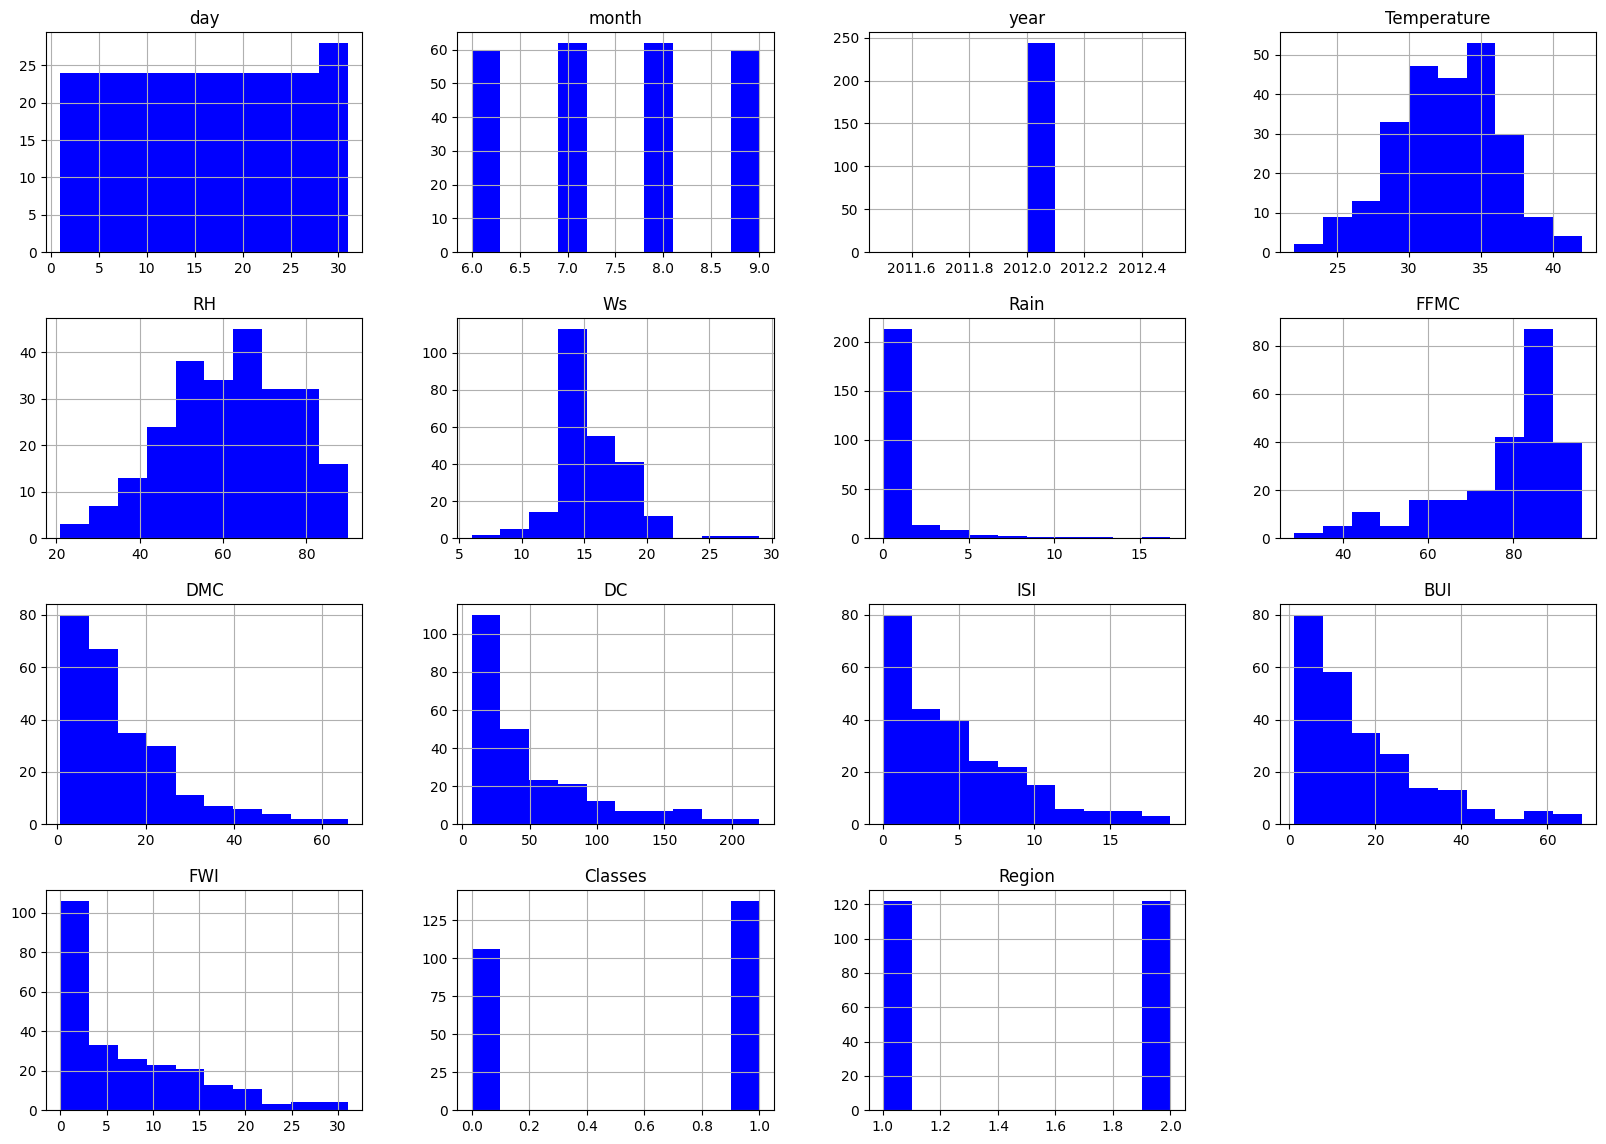

In [46]:
#HISTOGRAM

#A histogram is basically used to represent data provided in a form of some groups.It is accurate method for the graphical 
#representation of numerical data distribution.It is a type of bar plot where X-axis represents the bin ranges while Y-axis 
#gives information about frequency.

df1.hist(figsize=(20,14),color='b')


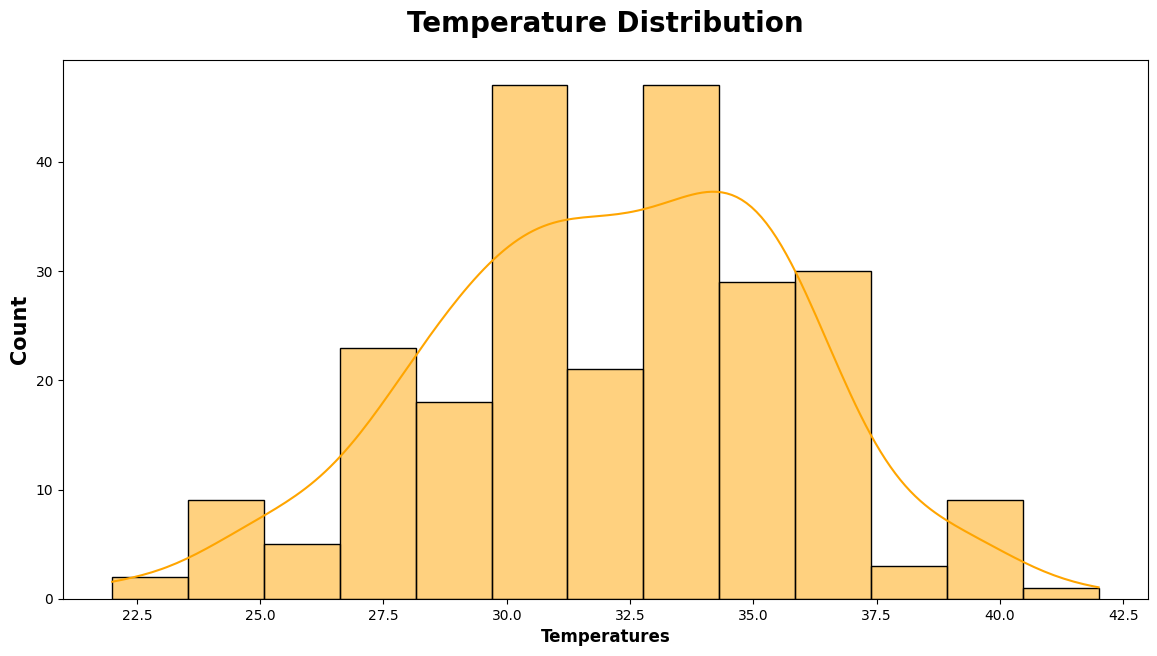

In [47]:
## Visualization of Target Feature

plt.subplots(figsize=(14,7))
sns.histplot(x=df1.Temperature, ec = "black", color='#FFA500', kde=True)
plt.title("Temperature Distribution", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=15)
plt.xlabel("Temperatures", weight="bold", fontsize=12)
plt.show()


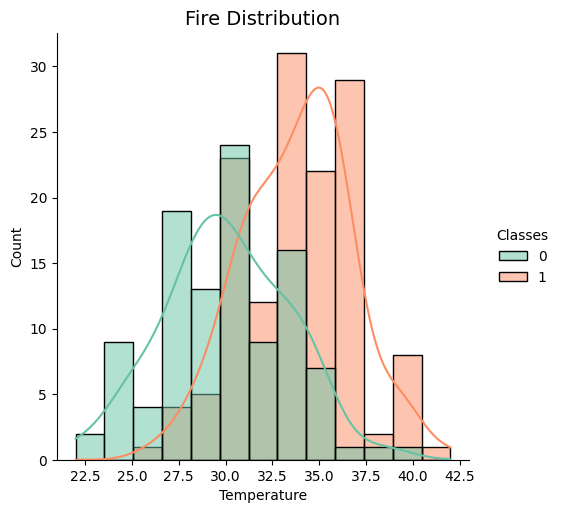

In [48]:
sns.displot(df1, x="Temperature", hue='Classes', kde=True,palette='Set2')
plt.title("Fire Distribution", fontsize =14)
plt.show()

# Observation:

During the analysis it has been found that range of temperature is from 22.5 degree celsius to 41.5 degree celsius and 

Range from 32.5 to 35.0 degree celsuis temperature has the highest frequency in the dataset.


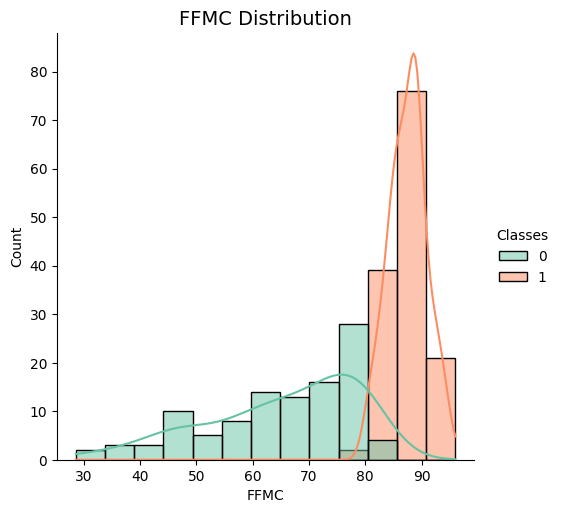

In [49]:
sns.displot(df1, x="FFMC", hue='Classes', kde=True,palette='Set2')
plt.title("FFMC Distribution", fontsize =14)
plt.show()

# Observation:
During the analysis it has been found that range of FFMC is from 29 to 101.
Range 85 to 91 has the highest frequency in the dataset.

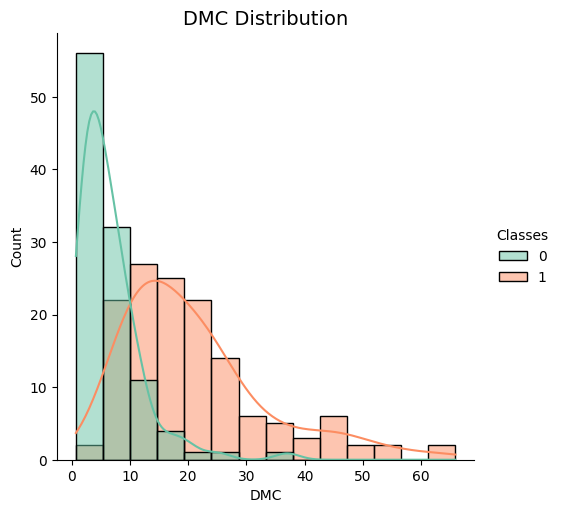

In [50]:
sns.displot(df1, x="DMC", hue='Classes', kde=True,palette='Set2')
plt.title("DMC Distribution", fontsize =14)
plt.show()

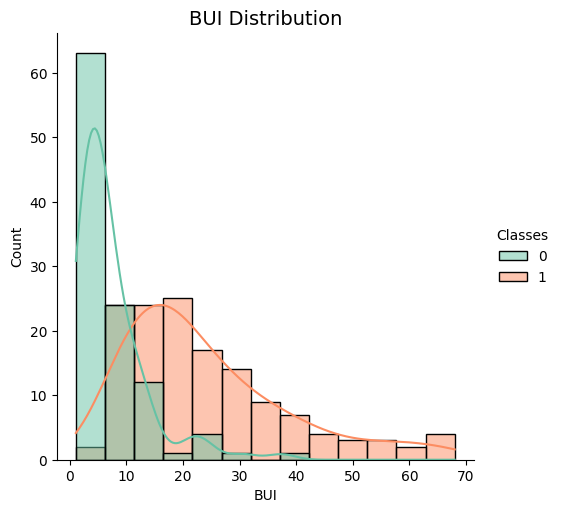

In [51]:
sns.displot(df1, x="BUI", hue='Classes', kde=True,palette='Set2')
plt.title("BUI Distribution", fontsize =14)
plt.show()

In [52]:
#Percentage of Fire and Non fire

percentage=df1.Classes.value_counts(normalize=True)*100
percentage

1    56.557377
0    43.442623
Name: Classes, dtype: float64

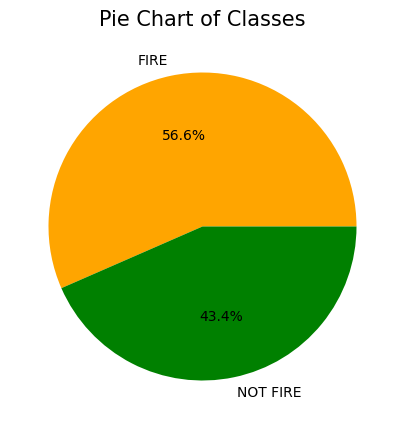

In [53]:
#plotting PieChart

classeslabels = ["FIRE", "NOT FIRE"]
colors = ['#FFA500', '#008000']
plt.figure(figsize =(12, 5))
plt.pie(percentage,labels = classeslabels,colors=colors,autopct='%1.1f%%')  
plt.title ("Pie Chart of Classes", fontsize = 15)
plt.show()

# Model Applying

# Logistic Regression

In [54]:
# Select the X variables

cols = ['Temperature','RH','ISI','Ws','FFMC','DMC','DC','BUI','FWI']
X = df1[cols].values

In [55]:
# Scale the X variables

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [56]:
col1 = ['Classes']
y = df1[col1].values

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [58]:
# Model fitting

model = LogisticRegression()
model.fit(X_train, y_train.ravel())

LogisticRegression()

In [59]:
# Make predictions on the train data

y_pred1 = model.predict(X_train)
print(y_pred1)

[0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 1 0 0 1 0 1 1 0 1 0 0 0 1
 1 1 0 0 1 1 1 0 1 0 1 0 0 1 1 1 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0
 1 0 0 1 0 1 1 0 1 0 1 0 1 1 1 1 1 0 1 1 0 0 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0
 1 1 1 1 0 0 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 0 1 1 0 1 0 1 1 0 0 1 0 0 1 1 1 0 1 1]


In [60]:
# Make predictions on the test data

y_pred = model.predict(X_test)
print(y_pred)

[1 0 1 1 1 0 1 1 0 1 1 0 1 1 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0 1 1 0 0 1 0 1 1
 0 1 0 1 1 1 1 1 0 1 0 1 1 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 0 1 0 1]


In [61]:
# Calculate the Train accuracy of the model

accuracy = accuracy_score(y_train, y_pred1)
print("Train Accuracy:",accuracy)


Train Accuracy: 0.9647058823529412


In [62]:
# Calculate the Test accuracy of the model

accuracy1 = accuracy_score(y_test, y_pred)
print("Test Accuracy:",accuracy1)

Test Accuracy: 0.9594594594594594


In [63]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[33  1]
 [ 2 38]]


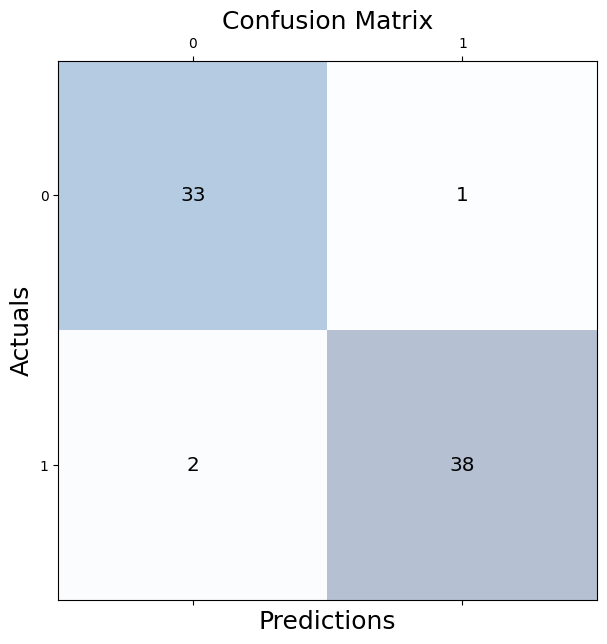

In [64]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(7, 7))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='x-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [65]:
# The matrix compares the actual target values with those predicted by the machine learning model

true_positive = cm[0][0]
false_positive = cm[0][1]
false_negative = cm[1][0]
true_negative = cm[1][1]

In [66]:
# Breaking down the formula for Accuracy

Accuracy = (true_positive + true_negative) / (true_positive + false_positive + false_negative + true_negative)
Accuracy

0.9594594594594594

In [67]:
# Precision is a measure of amongst all the positive predictions, how many of them were actually positive.

Precision = true_positive/(true_positive + false_positive)
Precision

0.9705882352941176

In [68]:
# From the total number of positive results how many positives were correctly predicted by the model.
# It shows how relevant the model is, in terms of positive results only.

Recall = true_positive/(true_positive + false_negative)
Recall

0.9428571428571428

In [69]:
# We need a metric that considers both Precision and Recall for evaluating a model. One such metric is the F1 score.
# F1 score is defined as the harmonic mean of Precision and Recall.

F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.9565217391304348

In [70]:
#AUC(Area Under Curve):

auc = roc_auc_score(y_test, y_pred)
auc

0.9602941176470587

# Support Vector Machine

In [71]:
#Model Fitting

classifier = svm.SVC(kernel = 'linear')
classifier.fit(X_train, y_train.ravel())


SVC(kernel='linear')

In [72]:
# Make predictions on the train data

predictions1=classifier.predict(X_train)
print(predictions1)


[0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 1 0 0 1 0 1 1 0 1 0 0 0 1
 1 1 1 0 1 1 1 0 1 0 1 0 0 1 1 1 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0
 1 0 0 1 0 1 1 0 1 0 1 0 1 1 1 1 1 0 1 1 0 0 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0
 1 1 1 1 0 0 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 0 1 1 0 1 1 1 1 0 0 1 0 0 1 1 1 0 1 1]


In [73]:
# Make predictions on the test data

predictions=classifier.predict(X_test)
print(predictions)

[1 0 1 1 1 0 1 1 0 1 1 0 1 1 0 0 1 1 0 0 1 0 0 0 1 1 1 0 1 1 1 0 0 1 0 1 1
 0 1 0 1 1 1 1 1 0 1 0 1 1 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 0 1 0 1]


In [74]:
# Calculate the Train accuracy of the model

svm_accuracy=accuracy_score(predictions1,y_train)
print("Train Accuracy: ",svm_accuracy)

Train Accuracy:  0.9764705882352941


In [75]:
# Calculate the Test accuracy of the model

svm_accuracy1=accuracy_score(predictions,y_test)
print("Test Accuracy: ",svm_accuracy1)

Test Accuracy:  0.972972972972973


In [76]:
cm1 = confusion_matrix(predictions,y_test)

print('Confusion matrix\n\n', cm1)

Confusion matrix

 [[33  1]
 [ 1 39]]


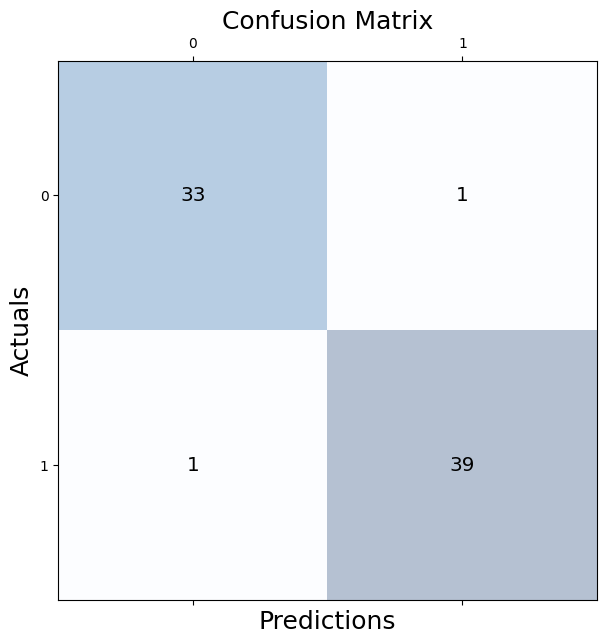

In [77]:
conf_matrix = confusion_matrix(y_true=predictions, y_pred=y_test)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(7, 7))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='x-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [78]:
# The matrix compares the actual target values with those predicted by the machine learning model

true_positive = cm1[0][0]
false_positive = cm1[0][1]
false_negative = cm1[1][0]
true_negative = cm1[1][1]

In [79]:
# Breaking down the formula for Accuracy

Accuracy = (true_positive + true_negative) / (true_positive + false_positive + false_negative + true_negative)
Accuracy

0.972972972972973

In [80]:
# Precision is a measure of amongst all the positive predictions, how many of them were actually positive.

Precision = true_positive/(true_positive + false_positive)
Precision

0.9705882352941176

In [81]:
# From the total number of positive results how many positives were correctly predicted by the model.
# It shows how relevant the model is, in terms of positive results only.

Recall = true_positive/(true_positive + false_negative)
Recall

0.9705882352941176

In [82]:
# We need a metric that considers both Precision and Recall for evaluating a model. One such metric is the F1 score.
# F1 score is defined as the harmonic mean of Precision and Recall.

F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.9705882352941176

In [83]:
#AUC(Area Under Curve):

auc = roc_auc_score(y_test, y_pred)
auc

0.9602941176470587

In [84]:
cols1 = ['ISI','FFMC']
X = df1[cols1].values

In [85]:
# Scale the X variables

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [86]:
col1 = ['Classes']
y = df1[col1].values

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [88]:
# Model fitting

model = RandomForestClassifier()
model.fit(X_train, y_train.ravel())

RandomForestClassifier()

In [89]:
# Make predictions on the train data

y_pred2 = model.predict(X_train)
print(y_pred2)

[0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 1 0 0 1 0 1 1 0 1 0 0 0 1
 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0
 1 0 0 1 0 1 1 0 1 0 1 0 1 1 1 1 1 0 1 1 0 0 1 1 1 1 0 0 1 0 0 1 1 0 0 1 0
 1 1 1 1 0 0 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 0 1 1 0 1 1 1 1
 1 1 1 0 1 1 0 1 1 1 1 0 0 1 0 0 1 1 1 0 1 1]


In [90]:
# Make predictions on the test data

y_pred3 = model.predict(X_test)
print(y_pred3)

[1 0 1 1 1 0 1 1 0 1 1 0 1 1 0 0 1 1 0 0 0 0 0 0 1 1 1 0 1 1 1 0 0 1 0 1 1
 0 1 0 1 1 1 1 1 0 1 0 1 1 1 0 0 1 0 0 0 0 0 0 1 1 1 1 0 1 1 0 0 0 0 1 0 1]


In [91]:
# Calculate the Train accuracy of the model
accuracy = accuracy_score(y_train, y_pred2)
print("Train Accuracy:",accuracy)

Train Accuracy: 1.0


In [92]:
# Calculate the Test accuracy of the model

accuracy1 = accuracy_score(y_test, y_pred3)
print("Test Accuracy:",accuracy1)

Test Accuracy: 1.0


In [106]:
import pandas_profiling

# load sample dataset
df2 = pd.read_csv(r'D:\Datascience-final_project\Algerian_forest_fires_dataset_UPDATE.csv')

# generate report
report = pandas_profiling.ProfileReport(df2)

In [107]:

from autoviz.AutoViz_Class import AutoViz_Class

# Load your dataset into a pandas dataframe
df = pd.read_csv('D:\Datascience-final_project\Algerian_forest_fires_dataset_UPDATE.csv')

# Create a visualization using AutoViz
AV = AutoViz_Class()
AV.AutoViz(df)

Not able to read or load file. Please check your inputs and try again...


In [129]:
import sweetviz as sv

# Load your dataset into a pandas dataframe
#df3 = pd.read_csv('D:\Datascience-final_project\Algerian_forest_fires_dataset_UPDATE.csv')
df3 = pd.read_csv('D:\Datascience-final_project\Forest-fire_clean_data.csv', header=None, names=['day','month','year','Temperature','RH','Ws','Rain','FFMC','DMC','DC','ISI','BUI','FWI','Classes','Region'])

# Create a report using Sweetviz
report =sv.analyze(df3)

                                             |                                             | [  0%]   00:00 ->…

In [122]:
# Display the report
#report.show_html()


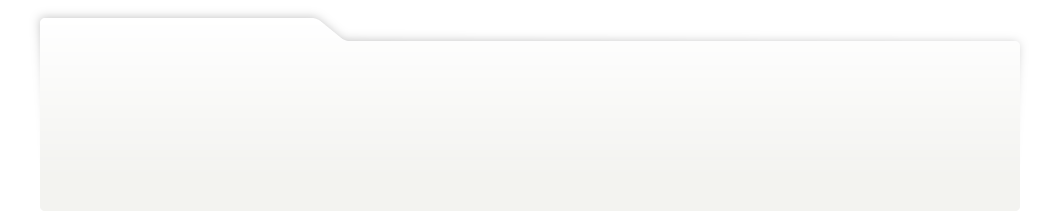
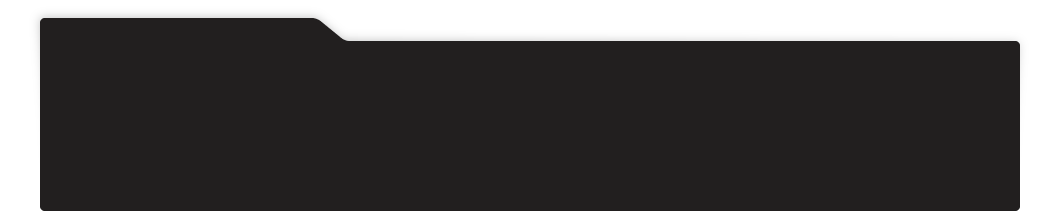
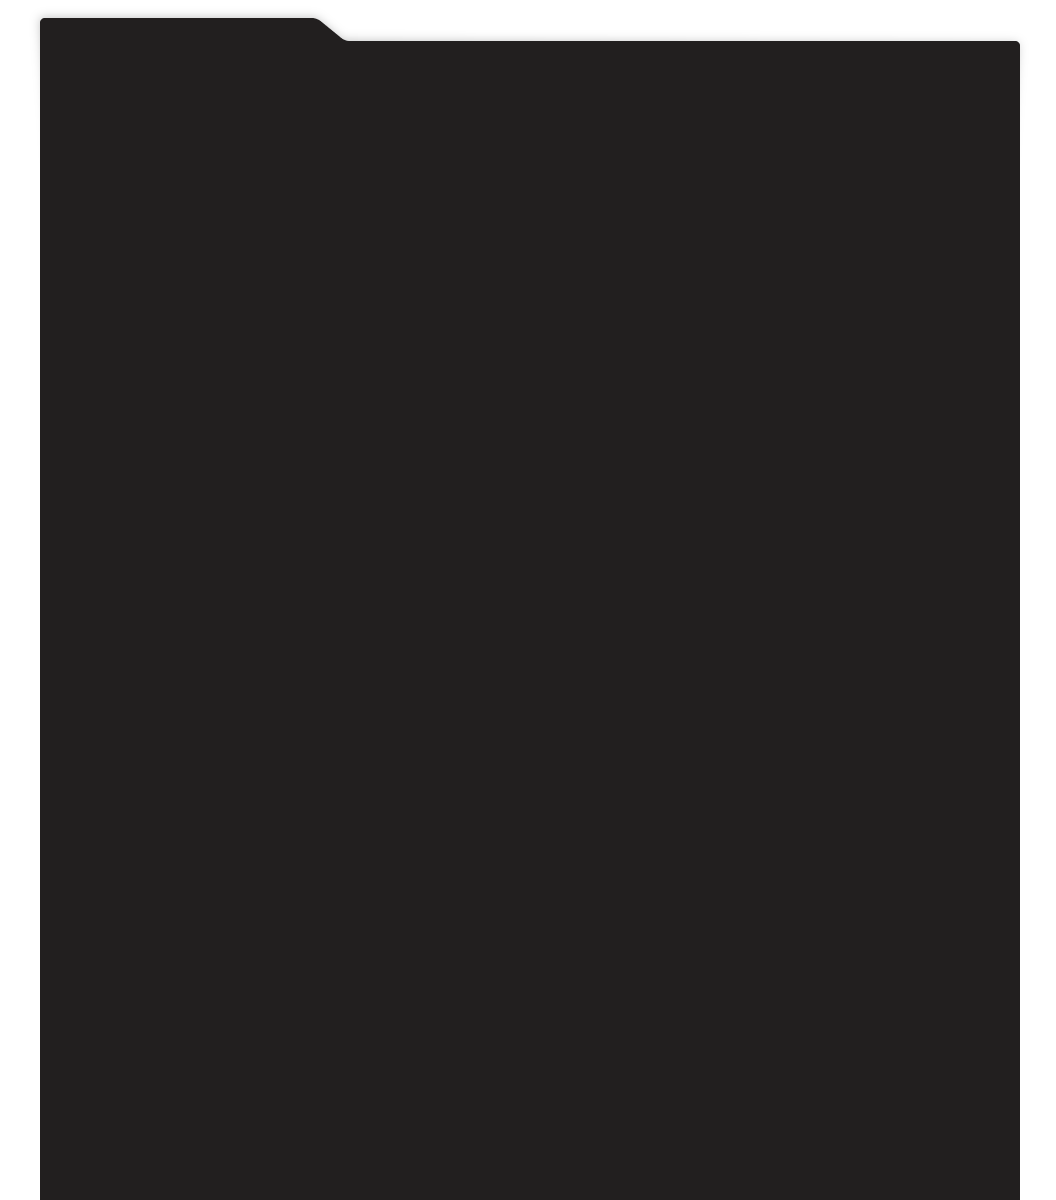
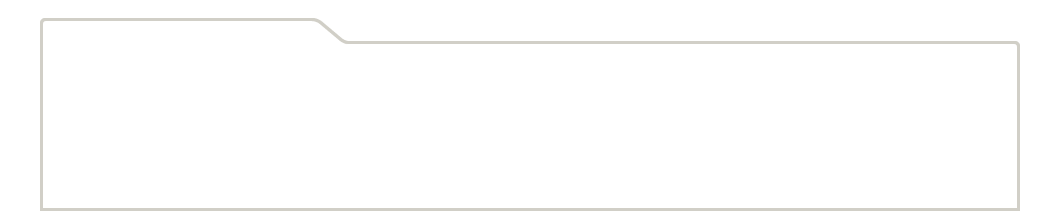
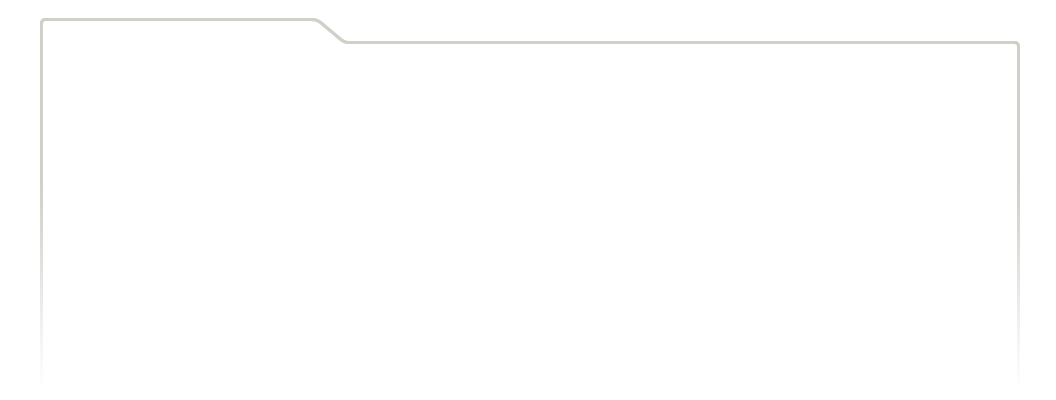
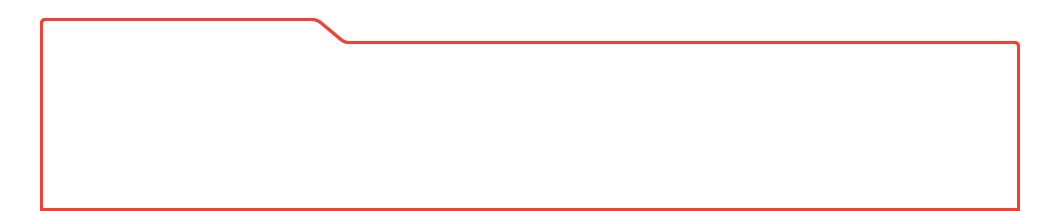
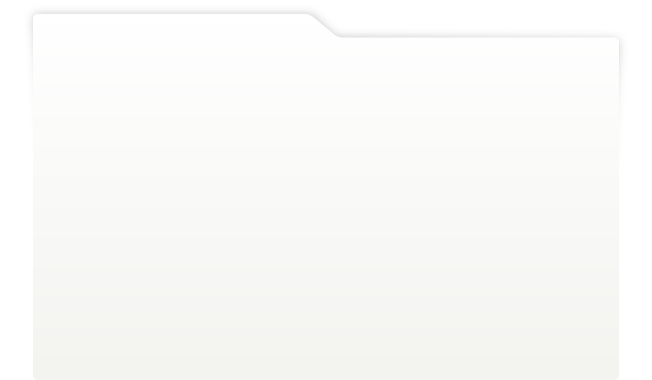
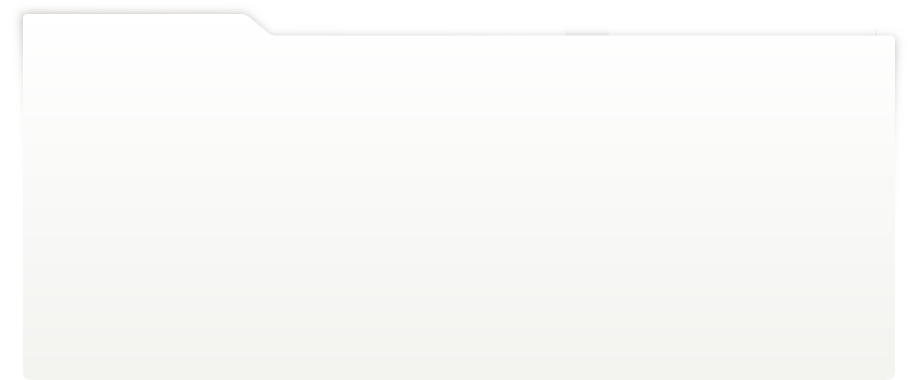
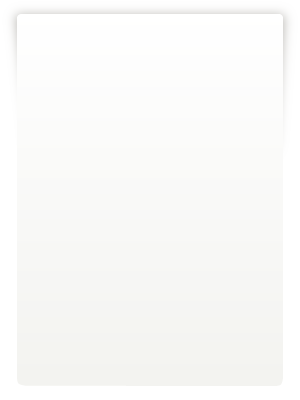
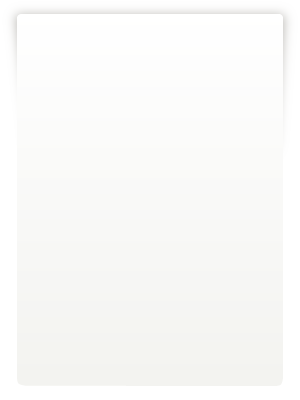
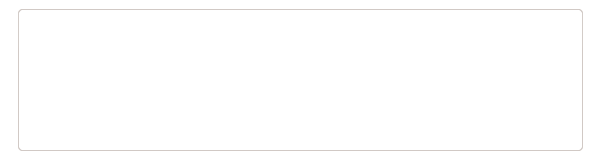
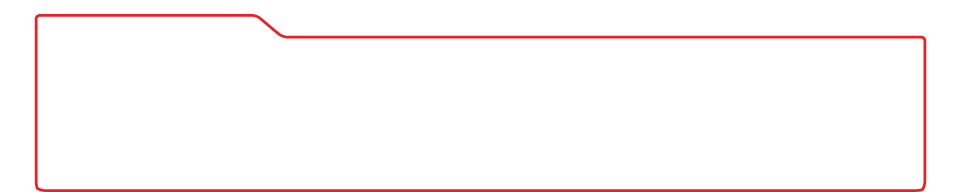
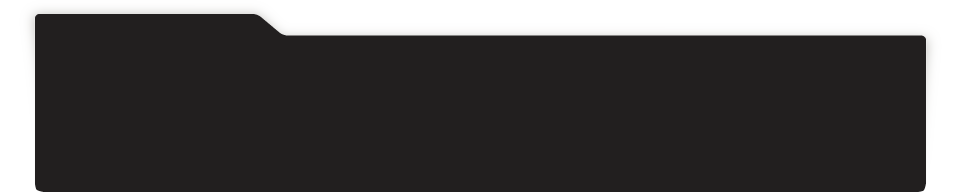
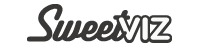
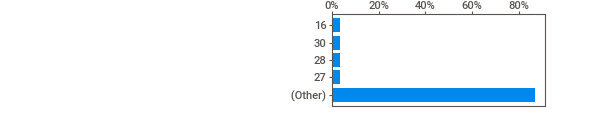
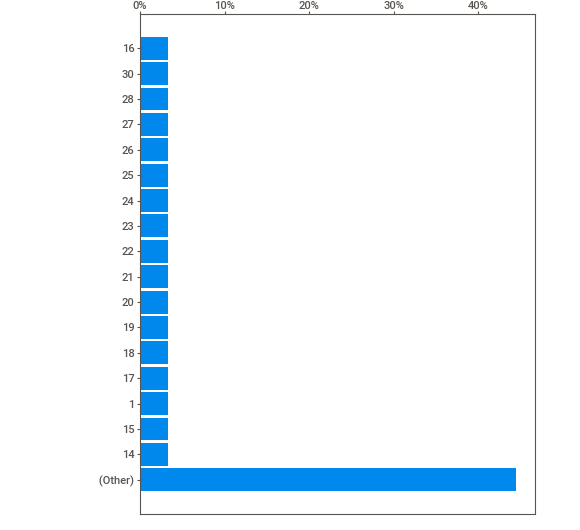
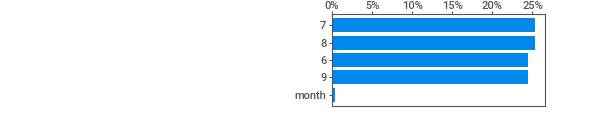
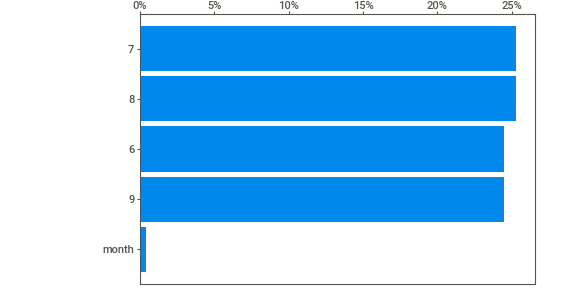
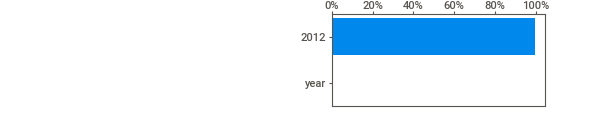
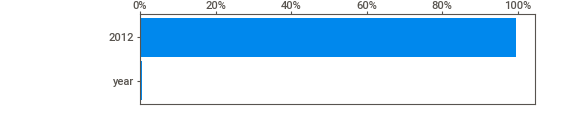
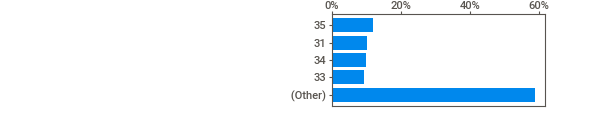
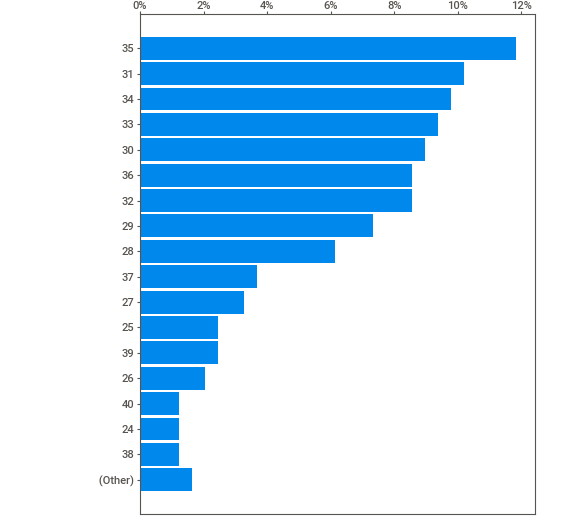
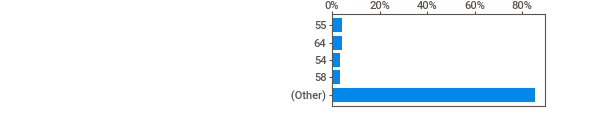
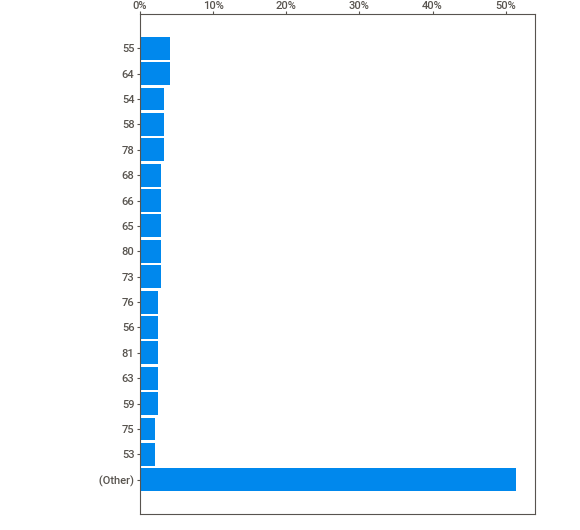
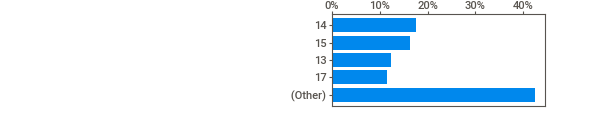
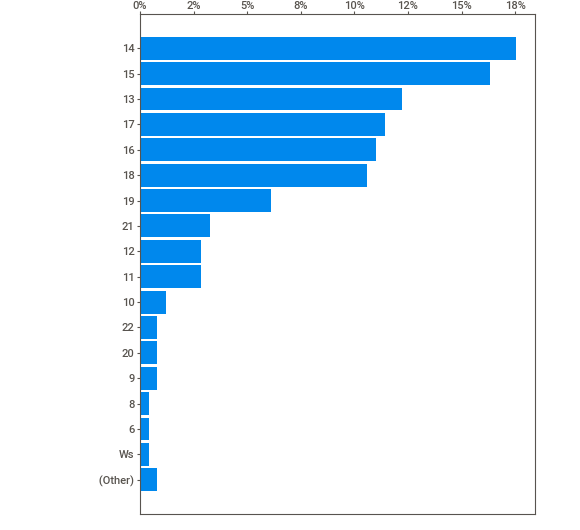
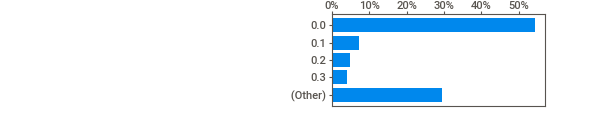
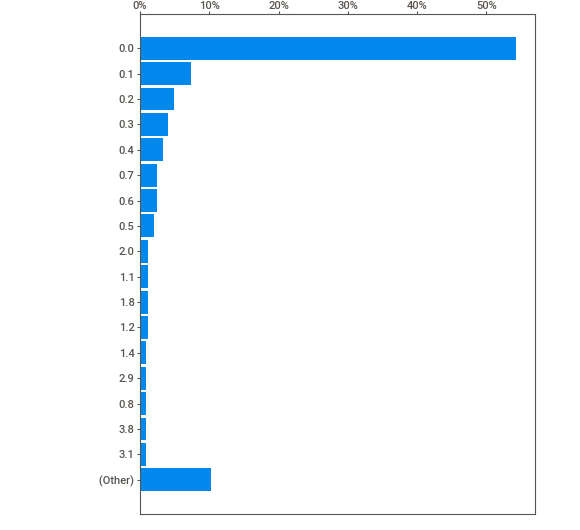
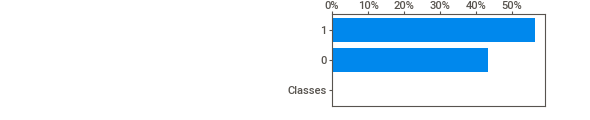
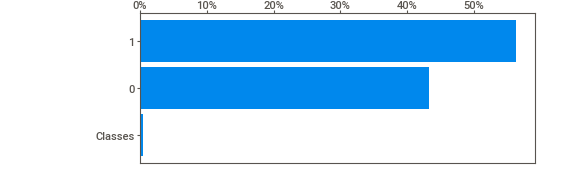
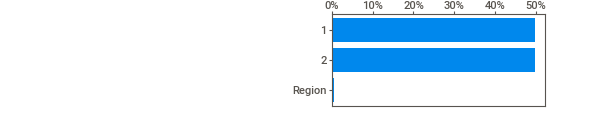
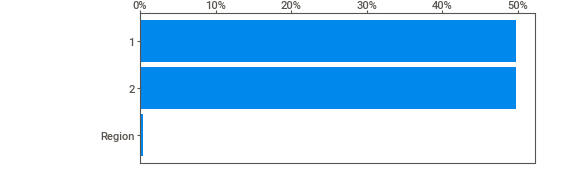
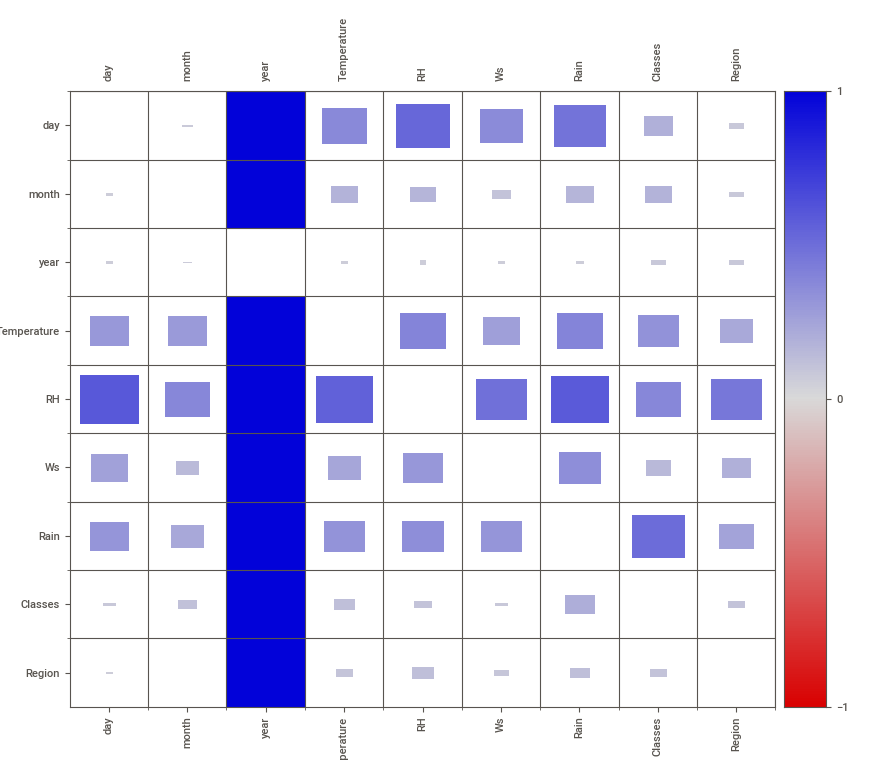
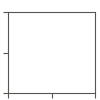

In [130]:
report.show_notebook()